# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

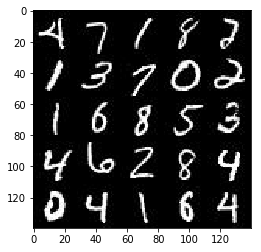

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

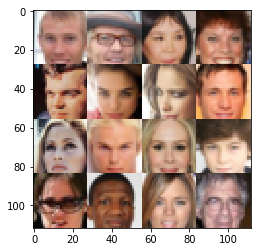

In [3]:
show_n_images = 20



"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_images = tf.placeholder(tf.float32, (None, image_width,image_height,image_channels), name='input_images')
    z = tf.placeholder(tf.float32, (None, z_dim), name='z')
    learning_rate = tf.placeholder(tf.float32, (None))

    return inputs_images, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [55]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
             
        x1 = tf.layers.conv2d(images, 64, 4, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 4, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 4, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        x4 = tf.layers.conv2d(relu3, 512, 4, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)

        # Flatten it
        flat = tf.reshape(relu4, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [54]:
def generator(z, out_channel_dim, is_train=True, alpha=.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=(not is_train)):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
    
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 4, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same')
      
        
        out = tf.tanh(logits)
        
        return out

            
        

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [56]:
def model_loss(input_real, input_z, out_channel_dim, alpha=.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    smooth = 0.9
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*smooth))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [57]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [58]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [59]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    inputs_real, inputs_z, learn_r = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[-1])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learn_r, beta1)
    step = 0 
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
              
                step = step+1
                                                        
                # scale to be between -1 and +1 
                X_std = (batch_images - np.amin(batch_images))/(np.amax(batch_images)-np.amin(batch_images))
                
                
                batch_images =  (X_std * 2) - 1
                
                
                 
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learn_r:learning_rate})
                # flip lables :
                
                _ = sess.run(g_train_opt, feed_dict={inputs_z: batch_z, inputs_real: batch_images,learn_r:learning_rate})
                
                if step % 10 == 0:
                    train_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z:batch_z})
                    print("Epoch {}/{} Step {}...".format(epoch_i+1, epoch_count, step),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g), "  difference (D-G): {:.4f}".format(train_loss_d-train_loss_g) )

                if step % 100 == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)

                    
               
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 Step 10... Discriminator Loss: 1.1203... Generator Loss: 10.2906   difference (D-G): -9.1703
Epoch 1/2 Step 20... Discriminator Loss: 2.0089... Generator Loss: 12.9115   difference (D-G): -10.9026
Epoch 1/2 Step 30... Discriminator Loss: 1.0942... Generator Loss: 12.2418   difference (D-G): -11.1476
Epoch 1/2 Step 40... Discriminator Loss: 0.6538... Generator Loss: 12.9720   difference (D-G): -12.3182
Epoch 1/2 Step 50... Discriminator Loss: 0.3691... Generator Loss: 6.0825   difference (D-G): -5.7134
Epoch 1/2 Step 60... Discriminator Loss: 3.2481... Generator Loss: 0.0769   difference (D-G): 3.1712
Epoch 1/2 Step 70... Discriminator Loss: 0.4334... Generator Loss: 6.0779   difference (D-G): -5.6445
Epoch 1/2 Step 80... Discriminator Loss: 2.1453... Generator Loss: 8.2627   difference (D-G): -6.1174
Epoch 1/2 Step 90... Discriminator Loss: 0.4666... Generator Loss: 2.3500   difference (D-G): -1.8834
Epoch 1/2 Step 100... Discriminator Loss: 0.5562... Generator Loss: 4.1163  

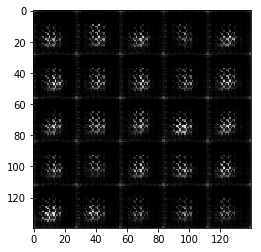

Epoch 1/2 Step 110... Discriminator Loss: 2.4958... Generator Loss: 0.1728   difference (D-G): 2.3230
Epoch 1/2 Step 120... Discriminator Loss: 1.5181... Generator Loss: 9.4804   difference (D-G): -7.9623
Epoch 1/2 Step 130... Discriminator Loss: 0.5009... Generator Loss: 2.1135   difference (D-G): -1.6127
Epoch 1/2 Step 140... Discriminator Loss: 0.4637... Generator Loss: 3.6401   difference (D-G): -3.1764
Epoch 1/2 Step 150... Discriminator Loss: 0.3632... Generator Loss: 4.4870   difference (D-G): -4.1238
Epoch 1/2 Step 160... Discriminator Loss: 1.4232... Generator Loss: 7.0022   difference (D-G): -5.5791
Epoch 1/2 Step 170... Discriminator Loss: 0.5289... Generator Loss: 2.4409   difference (D-G): -1.9120
Epoch 1/2 Step 180... Discriminator Loss: 0.8351... Generator Loss: 1.4295   difference (D-G): -0.5944
Epoch 1/2 Step 190... Discriminator Loss: 0.6419... Generator Loss: 2.1933   difference (D-G): -1.5514
Epoch 1/2 Step 200... Discriminator Loss: 2.3765... Generator Loss: 8.3149

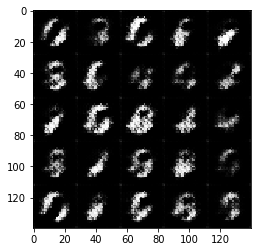

Epoch 1/2 Step 210... Discriminator Loss: 1.0905... Generator Loss: 0.9987   difference (D-G): 0.0918
Epoch 1/2 Step 220... Discriminator Loss: 1.0129... Generator Loss: 0.9673   difference (D-G): 0.0456
Epoch 1/2 Step 230... Discriminator Loss: 1.0489... Generator Loss: 0.8167   difference (D-G): 0.2323
Epoch 1/2 Step 240... Discriminator Loss: 0.7998... Generator Loss: 1.2072   difference (D-G): -0.4074
Epoch 1/2 Step 250... Discriminator Loss: 0.6486... Generator Loss: 3.4344   difference (D-G): -2.7858
Epoch 1/2 Step 260... Discriminator Loss: 0.9896... Generator Loss: 2.6839   difference (D-G): -1.6943
Epoch 1/2 Step 270... Discriminator Loss: 2.0324... Generator Loss: 0.2789   difference (D-G): 1.7535
Epoch 1/2 Step 280... Discriminator Loss: 0.8826... Generator Loss: 1.5485   difference (D-G): -0.6659
Epoch 1/2 Step 290... Discriminator Loss: 0.7466... Generator Loss: 1.4275   difference (D-G): -0.6810
Epoch 1/2 Step 300... Discriminator Loss: 1.8433... Generator Loss: 0.2839   

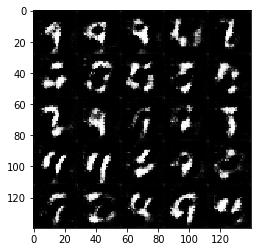

Epoch 1/2 Step 310... Discriminator Loss: 1.1526... Generator Loss: 0.7279   difference (D-G): 0.4247
Epoch 1/2 Step 320... Discriminator Loss: 1.5047... Generator Loss: 0.4752   difference (D-G): 1.0295
Epoch 1/2 Step 330... Discriminator Loss: 1.0689... Generator Loss: 0.6920   difference (D-G): 0.3769
Epoch 1/2 Step 340... Discriminator Loss: 2.1433... Generator Loss: 0.2350   difference (D-G): 1.9083
Epoch 1/2 Step 350... Discriminator Loss: 0.7565... Generator Loss: 1.3594   difference (D-G): -0.6029
Epoch 1/2 Step 360... Discriminator Loss: 1.3837... Generator Loss: 0.5912   difference (D-G): 0.7925
Epoch 1/2 Step 370... Discriminator Loss: 0.7614... Generator Loss: 2.0233   difference (D-G): -1.2619
Epoch 1/2 Step 380... Discriminator Loss: 0.8707... Generator Loss: 2.1898   difference (D-G): -1.3192
Epoch 1/2 Step 390... Discriminator Loss: 1.0184... Generator Loss: 2.3075   difference (D-G): -1.2891
Epoch 1/2 Step 400... Discriminator Loss: 0.7911... Generator Loss: 1.5051   d

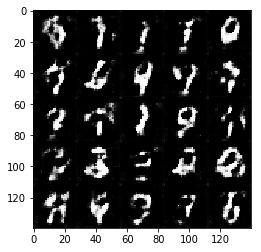

Epoch 1/2 Step 410... Discriminator Loss: 1.1252... Generator Loss: 0.7132   difference (D-G): 0.4120
Epoch 1/2 Step 420... Discriminator Loss: 1.4621... Generator Loss: 0.4477   difference (D-G): 1.0143
Epoch 1/2 Step 430... Discriminator Loss: 0.9177... Generator Loss: 1.3121   difference (D-G): -0.3944
Epoch 1/2 Step 440... Discriminator Loss: 1.7455... Generator Loss: 0.3582   difference (D-G): 1.3873
Epoch 1/2 Step 450... Discriminator Loss: 0.9238... Generator Loss: 1.5517   difference (D-G): -0.6279
Epoch 1/2 Step 460... Discriminator Loss: 1.0140... Generator Loss: 1.3538   difference (D-G): -0.3398
Epoch 1/2 Step 470... Discriminator Loss: 0.8719... Generator Loss: 1.2108   difference (D-G): -0.3389
Epoch 1/2 Step 480... Discriminator Loss: 1.6032... Generator Loss: 0.4361   difference (D-G): 1.1671
Epoch 1/2 Step 490... Discriminator Loss: 1.5029... Generator Loss: 0.4652   difference (D-G): 1.0377
Epoch 1/2 Step 500... Discriminator Loss: 0.8629... Generator Loss: 1.1740   d

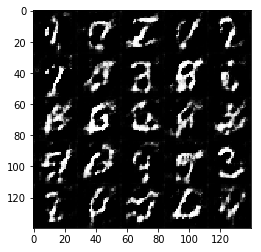

Epoch 1/2 Step 510... Discriminator Loss: 2.1067... Generator Loss: 0.2195   difference (D-G): 1.8872
Epoch 1/2 Step 520... Discriminator Loss: 1.0084... Generator Loss: 1.0188   difference (D-G): -0.0104
Epoch 1/2 Step 530... Discriminator Loss: 0.8344... Generator Loss: 1.8027   difference (D-G): -0.9683
Epoch 1/2 Step 540... Discriminator Loss: 0.7628... Generator Loss: 1.5502   difference (D-G): -0.7875
Epoch 1/2 Step 550... Discriminator Loss: 1.1414... Generator Loss: 0.7327   difference (D-G): 0.4087
Epoch 1/2 Step 560... Discriminator Loss: 0.7196... Generator Loss: 2.6505   difference (D-G): -1.9309
Epoch 1/2 Step 570... Discriminator Loss: 1.2185... Generator Loss: 0.6280   difference (D-G): 0.5905
Epoch 1/2 Step 580... Discriminator Loss: 2.0373... Generator Loss: 0.2347   difference (D-G): 1.8026
Epoch 1/2 Step 590... Discriminator Loss: 1.3372... Generator Loss: 0.5882   difference (D-G): 0.7490
Epoch 1/2 Step 600... Discriminator Loss: 1.7011... Generator Loss: 0.3273   d

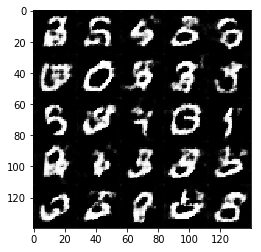

Epoch 1/2 Step 610... Discriminator Loss: 0.7088... Generator Loss: 1.3594   difference (D-G): -0.6506
Epoch 1/2 Step 620... Discriminator Loss: 1.9684... Generator Loss: 0.3333   difference (D-G): 1.6351
Epoch 1/2 Step 630... Discriminator Loss: 1.5224... Generator Loss: 0.4201   difference (D-G): 1.1023
Epoch 1/2 Step 640... Discriminator Loss: 1.5435... Generator Loss: 0.4179   difference (D-G): 1.1256
Epoch 1/2 Step 650... Discriminator Loss: 1.3318... Generator Loss: 0.5646   difference (D-G): 0.7672
Epoch 1/2 Step 660... Discriminator Loss: 1.4041... Generator Loss: 0.4479   difference (D-G): 0.9562
Epoch 1/2 Step 670... Discriminator Loss: 1.2772... Generator Loss: 2.5777   difference (D-G): -1.3006
Epoch 1/2 Step 680... Discriminator Loss: 1.6605... Generator Loss: 0.4011   difference (D-G): 1.2594
Epoch 1/2 Step 690... Discriminator Loss: 1.4894... Generator Loss: 3.0377   difference (D-G): -1.5483
Epoch 1/2 Step 700... Discriminator Loss: 0.8225... Generator Loss: 1.4829   di

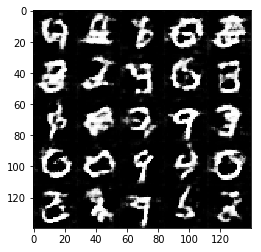

Epoch 1/2 Step 710... Discriminator Loss: 1.2410... Generator Loss: 0.7320   difference (D-G): 0.5090
Epoch 1/2 Step 720... Discriminator Loss: 1.1048... Generator Loss: 0.7848   difference (D-G): 0.3200
Epoch 1/2 Step 730... Discriminator Loss: 1.7328... Generator Loss: 0.3421   difference (D-G): 1.3908
Epoch 1/2 Step 740... Discriminator Loss: 1.0557... Generator Loss: 0.8985   difference (D-G): 0.1572
Epoch 1/2 Step 750... Discriminator Loss: 0.7811... Generator Loss: 1.3536   difference (D-G): -0.5725
Epoch 1/2 Step 760... Discriminator Loss: 0.6974... Generator Loss: 1.4048   difference (D-G): -0.7074
Epoch 1/2 Step 770... Discriminator Loss: 0.8590... Generator Loss: 1.0944   difference (D-G): -0.2354
Epoch 1/2 Step 780... Discriminator Loss: 1.4799... Generator Loss: 3.2466   difference (D-G): -1.7667
Epoch 1/2 Step 790... Discriminator Loss: 1.7247... Generator Loss: 0.3322   difference (D-G): 1.3925
Epoch 1/2 Step 800... Discriminator Loss: 0.7908... Generator Loss: 1.8558   d

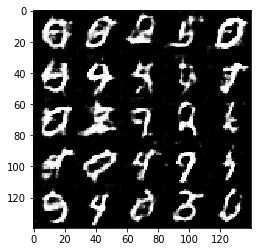

Epoch 1/2 Step 810... Discriminator Loss: 0.9008... Generator Loss: 2.5217   difference (D-G): -1.6209
Epoch 1/2 Step 820... Discriminator Loss: 1.2506... Generator Loss: 3.2164   difference (D-G): -1.9659
Epoch 1/2 Step 830... Discriminator Loss: 1.2621... Generator Loss: 2.7636   difference (D-G): -1.5015
Epoch 1/2 Step 840... Discriminator Loss: 1.2250... Generator Loss: 1.7640   difference (D-G): -0.5390
Epoch 1/2 Step 850... Discriminator Loss: 0.8201... Generator Loss: 1.0410   difference (D-G): -0.2210
Epoch 1/2 Step 860... Discriminator Loss: 0.9138... Generator Loss: 0.9254   difference (D-G): -0.0117
Epoch 1/2 Step 870... Discriminator Loss: 1.4080... Generator Loss: 2.3522   difference (D-G): -0.9442
Epoch 1/2 Step 880... Discriminator Loss: 1.9363... Generator Loss: 0.2905   difference (D-G): 1.6458
Epoch 1/2 Step 890... Discriminator Loss: 1.3030... Generator Loss: 0.5445   difference (D-G): 0.7585
Epoch 1/2 Step 900... Discriminator Loss: 1.4605... Generator Loss: 0.4774 

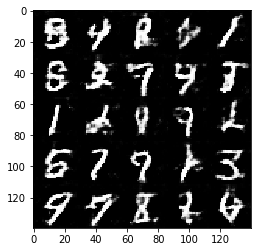

Epoch 1/2 Step 910... Discriminator Loss: 2.1734... Generator Loss: 0.2197   difference (D-G): 1.9537
Epoch 1/2 Step 920... Discriminator Loss: 0.9551... Generator Loss: 1.2205   difference (D-G): -0.2653
Epoch 1/2 Step 930... Discriminator Loss: 0.8030... Generator Loss: 1.3051   difference (D-G): -0.5020
Epoch 1/2 Step 940... Discriminator Loss: 0.8611... Generator Loss: 1.3360   difference (D-G): -0.4749
Epoch 1/2 Step 950... Discriminator Loss: 1.5635... Generator Loss: 0.4071   difference (D-G): 1.1563
Epoch 1/2 Step 960... Discriminator Loss: 1.2074... Generator Loss: 0.6381   difference (D-G): 0.5693
Epoch 1/2 Step 970... Discriminator Loss: 1.4938... Generator Loss: 0.5353   difference (D-G): 0.9585
Epoch 1/2 Step 980... Discriminator Loss: 1.7800... Generator Loss: 0.3332   difference (D-G): 1.4467
Epoch 1/2 Step 990... Discriminator Loss: 2.0038... Generator Loss: 0.3056   difference (D-G): 1.6982
Epoch 1/2 Step 1000... Discriminator Loss: 0.8021... Generator Loss: 1.2291   d

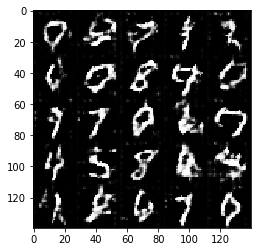

Epoch 1/2 Step 1010... Discriminator Loss: 1.1467... Generator Loss: 0.7943   difference (D-G): 0.3523
Epoch 1/2 Step 1020... Discriminator Loss: 1.1136... Generator Loss: 0.6843   difference (D-G): 0.4293
Epoch 1/2 Step 1030... Discriminator Loss: 1.8930... Generator Loss: 0.3454   difference (D-G): 1.5476
Epoch 1/2 Step 1040... Discriminator Loss: 2.2621... Generator Loss: 0.1979   difference (D-G): 2.0642
Epoch 1/2 Step 1050... Discriminator Loss: 1.6487... Generator Loss: 0.3924   difference (D-G): 1.2563
Epoch 1/2 Step 1060... Discriminator Loss: 0.9049... Generator Loss: 1.2418   difference (D-G): -0.3369
Epoch 1/2 Step 1070... Discriminator Loss: 1.2815... Generator Loss: 0.5715   difference (D-G): 0.7100
Epoch 1/2 Step 1080... Discriminator Loss: 1.0274... Generator Loss: 0.7907   difference (D-G): 0.2367
Epoch 1/2 Step 1090... Discriminator Loss: 1.0691... Generator Loss: 0.8404   difference (D-G): 0.2287
Epoch 1/2 Step 1100... Discriminator Loss: 0.7222... Generator Loss: 1.5

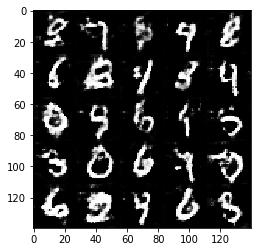

Epoch 1/2 Step 1110... Discriminator Loss: 2.0692... Generator Loss: 0.2914   difference (D-G): 1.7778
Epoch 1/2 Step 1120... Discriminator Loss: 1.7205... Generator Loss: 0.3346   difference (D-G): 1.3859
Epoch 1/2 Step 1130... Discriminator Loss: 1.4334... Generator Loss: 0.5393   difference (D-G): 0.8941
Epoch 1/2 Step 1140... Discriminator Loss: 0.6582... Generator Loss: 2.1277   difference (D-G): -1.4696
Epoch 1/2 Step 1150... Discriminator Loss: 0.8472... Generator Loss: 1.0429   difference (D-G): -0.1957
Epoch 1/2 Step 1160... Discriminator Loss: 1.4124... Generator Loss: 0.5359   difference (D-G): 0.8766
Epoch 1/2 Step 1170... Discriminator Loss: 1.3965... Generator Loss: 0.5322   difference (D-G): 0.8643
Epoch 1/2 Step 1180... Discriminator Loss: 0.7130... Generator Loss: 2.2149   difference (D-G): -1.5019
Epoch 1/2 Step 1190... Discriminator Loss: 1.0758... Generator Loss: 2.6469   difference (D-G): -1.5711
Epoch 1/2 Step 1200... Discriminator Loss: 0.8700... Generator Loss: 

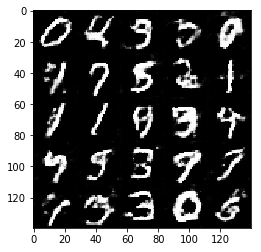

Epoch 1/2 Step 1210... Discriminator Loss: 1.7123... Generator Loss: 0.3864   difference (D-G): 1.3259
Epoch 1/2 Step 1220... Discriminator Loss: 0.8938... Generator Loss: 0.8929   difference (D-G): 0.0009
Epoch 1/2 Step 1230... Discriminator Loss: 2.0673... Generator Loss: 0.2381   difference (D-G): 1.8292
Epoch 1/2 Step 1240... Discriminator Loss: 1.1370... Generator Loss: 0.6562   difference (D-G): 0.4807
Epoch 1/2 Step 1250... Discriminator Loss: 1.6495... Generator Loss: 0.4546   difference (D-G): 1.1949
Epoch 1/2 Step 1260... Discriminator Loss: 1.1035... Generator Loss: 2.9045   difference (D-G): -1.8009
Epoch 1/2 Step 1270... Discriminator Loss: 1.1371... Generator Loss: 0.7587   difference (D-G): 0.3783
Epoch 1/2 Step 1280... Discriminator Loss: 0.6947... Generator Loss: 2.4813   difference (D-G): -1.7866
Epoch 1/2 Step 1290... Discriminator Loss: 1.2734... Generator Loss: 0.6788   difference (D-G): 0.5946
Epoch 1/2 Step 1300... Discriminator Loss: 2.3478... Generator Loss: 0.

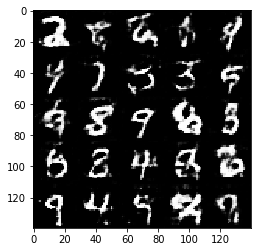

Epoch 1/2 Step 1310... Discriminator Loss: 1.8342... Generator Loss: 2.7508   difference (D-G): -0.9166
Epoch 1/2 Step 1320... Discriminator Loss: 1.2958... Generator Loss: 0.6158   difference (D-G): 0.6800
Epoch 1/2 Step 1330... Discriminator Loss: 0.8680... Generator Loss: 1.0874   difference (D-G): -0.2194
Epoch 1/2 Step 1340... Discriminator Loss: 0.9681... Generator Loss: 1.0830   difference (D-G): -0.1149
Epoch 1/2 Step 1350... Discriminator Loss: 0.6705... Generator Loss: 1.8786   difference (D-G): -1.2081
Epoch 1/2 Step 1360... Discriminator Loss: 0.6658... Generator Loss: 1.6147   difference (D-G): -0.9489
Epoch 1/2 Step 1370... Discriminator Loss: 2.2657... Generator Loss: 0.2077   difference (D-G): 2.0579
Epoch 1/2 Step 1380... Discriminator Loss: 0.7063... Generator Loss: 1.9348   difference (D-G): -1.2285
Epoch 1/2 Step 1390... Discriminator Loss: 0.7059... Generator Loss: 1.7691   difference (D-G): -1.0631
Epoch 1/2 Step 1400... Discriminator Loss: 1.0218... Generator Los

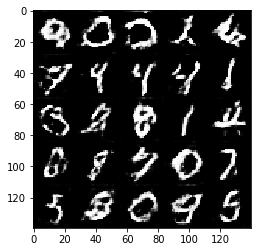

Epoch 1/2 Step 1410... Discriminator Loss: 0.8767... Generator Loss: 0.9670   difference (D-G): -0.0903
Epoch 1/2 Step 1420... Discriminator Loss: 0.6621... Generator Loss: 1.8771   difference (D-G): -1.2151
Epoch 1/2 Step 1430... Discriminator Loss: 0.8043... Generator Loss: 1.0946   difference (D-G): -0.2903
Epoch 1/2 Step 1440... Discriminator Loss: 0.4894... Generator Loss: 2.5112   difference (D-G): -2.0217
Epoch 1/2 Step 1450... Discriminator Loss: 0.6366... Generator Loss: 1.8195   difference (D-G): -1.1829
Epoch 1/2 Step 1460... Discriminator Loss: 0.9605... Generator Loss: 0.9208   difference (D-G): 0.0398
Epoch 1/2 Step 1470... Discriminator Loss: 2.7022... Generator Loss: 0.1544   difference (D-G): 2.5478
Epoch 1/2 Step 1480... Discriminator Loss: 0.9183... Generator Loss: 3.6171   difference (D-G): -2.6988
Epoch 1/2 Step 1490... Discriminator Loss: 0.8624... Generator Loss: 1.0658   difference (D-G): -0.2034
Epoch 1/2 Step 1500... Discriminator Loss: 0.9680... Generator Los

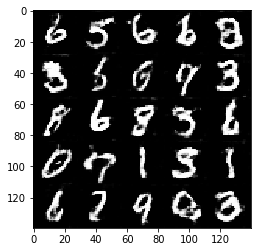

Epoch 1/2 Step 1510... Discriminator Loss: 0.7792... Generator Loss: 2.3569   difference (D-G): -1.5778
Epoch 1/2 Step 1520... Discriminator Loss: 0.5569... Generator Loss: 1.8088   difference (D-G): -1.2519
Epoch 1/2 Step 1530... Discriminator Loss: 0.5604... Generator Loss: 1.8541   difference (D-G): -1.2937
Epoch 1/2 Step 1540... Discriminator Loss: 1.0738... Generator Loss: 2.3650   difference (D-G): -1.2913
Epoch 1/2 Step 1550... Discriminator Loss: 3.0280... Generator Loss: 0.1198   difference (D-G): 2.9083
Epoch 1/2 Step 1560... Discriminator Loss: 0.8270... Generator Loss: 1.2677   difference (D-G): -0.4407
Epoch 1/2 Step 1570... Discriminator Loss: 0.6343... Generator Loss: 1.6243   difference (D-G): -0.9901
Epoch 1/2 Step 1580... Discriminator Loss: 0.7575... Generator Loss: 1.3650   difference (D-G): -0.6074
Epoch 1/2 Step 1590... Discriminator Loss: 0.8574... Generator Loss: 1.0872   difference (D-G): -0.2298
Epoch 1/2 Step 1600... Discriminator Loss: 1.4467... Generator Lo

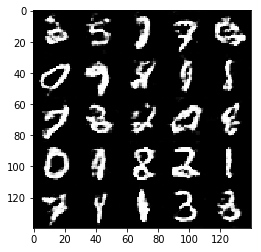

Epoch 1/2 Step 1610... Discriminator Loss: 1.2673... Generator Loss: 0.6462   difference (D-G): 0.6211
Epoch 1/2 Step 1620... Discriminator Loss: 0.6625... Generator Loss: 1.4286   difference (D-G): -0.7661
Epoch 1/2 Step 1630... Discriminator Loss: 1.5050... Generator Loss: 0.4232   difference (D-G): 1.0818
Epoch 1/2 Step 1640... Discriminator Loss: 0.9473... Generator Loss: 0.9777   difference (D-G): -0.0304
Epoch 1/2 Step 1650... Discriminator Loss: 1.0123... Generator Loss: 0.9254   difference (D-G): 0.0869
Epoch 1/2 Step 1660... Discriminator Loss: 0.6490... Generator Loss: 1.7707   difference (D-G): -1.1217
Epoch 1/2 Step 1670... Discriminator Loss: 0.7862... Generator Loss: 1.8111   difference (D-G): -1.0249
Epoch 1/2 Step 1680... Discriminator Loss: 1.3723... Generator Loss: 0.5180   difference (D-G): 0.8543
Epoch 1/2 Step 1690... Discriminator Loss: 0.6610... Generator Loss: 2.4669   difference (D-G): -1.8059
Epoch 1/2 Step 1700... Discriminator Loss: 1.0193... Generator Loss:

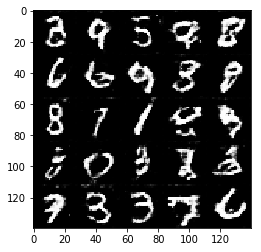

Epoch 1/2 Step 1710... Discriminator Loss: 0.9037... Generator Loss: 0.9514   difference (D-G): -0.0477
Epoch 1/2 Step 1720... Discriminator Loss: 2.1254... Generator Loss: 0.2446   difference (D-G): 1.8808
Epoch 1/2 Step 1730... Discriminator Loss: 1.4154... Generator Loss: 0.6712   difference (D-G): 0.7442
Epoch 1/2 Step 1740... Discriminator Loss: 0.6079... Generator Loss: 2.4453   difference (D-G): -1.8374
Epoch 1/2 Step 1750... Discriminator Loss: 1.2574... Generator Loss: 0.6216   difference (D-G): 0.6358
Epoch 1/2 Step 1760... Discriminator Loss: 0.8076... Generator Loss: 1.0519   difference (D-G): -0.2442
Epoch 1/2 Step 1770... Discriminator Loss: 0.9145... Generator Loss: 0.9202   difference (D-G): -0.0057
Epoch 1/2 Step 1780... Discriminator Loss: 0.6116... Generator Loss: 1.6219   difference (D-G): -1.0103
Epoch 1/2 Step 1790... Discriminator Loss: 1.3632... Generator Loss: 3.6052   difference (D-G): -2.2420
Epoch 1/2 Step 1800... Discriminator Loss: 0.7887... Generator Loss

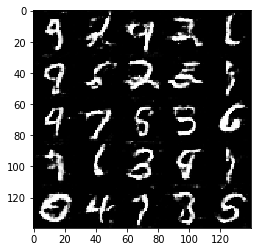

Epoch 1/2 Step 1810... Discriminator Loss: 0.7167... Generator Loss: 1.3928   difference (D-G): -0.6760
Epoch 1/2 Step 1820... Discriminator Loss: 0.5287... Generator Loss: 1.7810   difference (D-G): -1.2524
Epoch 1/2 Step 1830... Discriminator Loss: 0.7082... Generator Loss: 1.3825   difference (D-G): -0.6744
Epoch 1/2 Step 1840... Discriminator Loss: 1.6565... Generator Loss: 0.5499   difference (D-G): 1.1066
Epoch 1/2 Step 1850... Discriminator Loss: 0.5804... Generator Loss: 2.3462   difference (D-G): -1.7658
Epoch 1/2 Step 1860... Discriminator Loss: 1.4797... Generator Loss: 0.4992   difference (D-G): 0.9806
Epoch 1/2 Step 1870... Discriminator Loss: 0.6400... Generator Loss: 1.6690   difference (D-G): -1.0290
Epoch 2/2 Step 1880... Discriminator Loss: 0.9831... Generator Loss: 0.8245   difference (D-G): 0.1586
Epoch 2/2 Step 1890... Discriminator Loss: 0.8280... Generator Loss: 1.4084   difference (D-G): -0.5803
Epoch 2/2 Step 1900... Discriminator Loss: 2.7153... Generator Loss

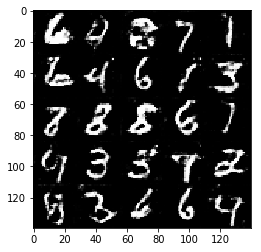

Epoch 2/2 Step 1910... Discriminator Loss: 0.7400... Generator Loss: 1.4269   difference (D-G): -0.6869
Epoch 2/2 Step 1920... Discriminator Loss: 1.1260... Generator Loss: 0.9262   difference (D-G): 0.1997
Epoch 2/2 Step 1930... Discriminator Loss: 0.6098... Generator Loss: 1.7018   difference (D-G): -1.0919
Epoch 2/2 Step 1940... Discriminator Loss: 0.5191... Generator Loss: 2.2273   difference (D-G): -1.7082
Epoch 2/2 Step 1950... Discriminator Loss: 0.6042... Generator Loss: 1.7685   difference (D-G): -1.1643
Epoch 2/2 Step 1960... Discriminator Loss: 0.6660... Generator Loss: 1.7077   difference (D-G): -1.0417
Epoch 2/2 Step 1970... Discriminator Loss: 1.2612... Generator Loss: 0.6463   difference (D-G): 0.6149
Epoch 2/2 Step 1980... Discriminator Loss: 0.6400... Generator Loss: 1.4911   difference (D-G): -0.8511
Epoch 2/2 Step 1990... Discriminator Loss: 1.0366... Generator Loss: 0.9087   difference (D-G): 0.1279
Epoch 2/2 Step 2000... Discriminator Loss: 0.6923... Generator Loss

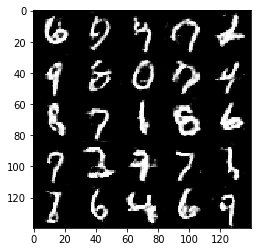

Epoch 2/2 Step 2010... Discriminator Loss: 1.0968... Generator Loss: 0.7741   difference (D-G): 0.3227
Epoch 2/2 Step 2020... Discriminator Loss: 1.8800... Generator Loss: 0.2644   difference (D-G): 1.6156
Epoch 2/2 Step 2030... Discriminator Loss: 0.5089... Generator Loss: 2.4757   difference (D-G): -1.9668
Epoch 2/2 Step 2040... Discriminator Loss: 0.6204... Generator Loss: 1.5217   difference (D-G): -0.9013
Epoch 2/2 Step 2050... Discriminator Loss: 0.9129... Generator Loss: 0.9990   difference (D-G): -0.0861
Epoch 2/2 Step 2060... Discriminator Loss: 0.8012... Generator Loss: 6.8360   difference (D-G): -6.0348
Epoch 2/2 Step 2070... Discriminator Loss: 1.3737... Generator Loss: 0.4649   difference (D-G): 0.9088
Epoch 2/2 Step 2080... Discriminator Loss: 1.9795... Generator Loss: 0.3506   difference (D-G): 1.6289
Epoch 2/2 Step 2090... Discriminator Loss: 1.3004... Generator Loss: 0.6176   difference (D-G): 0.6829
Epoch 2/2 Step 2100... Discriminator Loss: 0.5437... Generator Loss: 

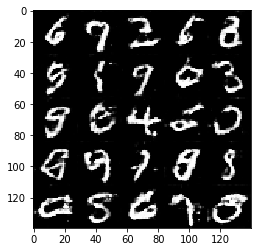

Epoch 2/2 Step 2110... Discriminator Loss: 0.6574... Generator Loss: 1.4894   difference (D-G): -0.8320
Epoch 2/2 Step 2120... Discriminator Loss: 0.5259... Generator Loss: 2.0680   difference (D-G): -1.5421
Epoch 2/2 Step 2130... Discriminator Loss: 1.2152... Generator Loss: 0.6141   difference (D-G): 0.6011
Epoch 2/2 Step 2140... Discriminator Loss: 0.7531... Generator Loss: 1.1823   difference (D-G): -0.4292
Epoch 2/2 Step 2150... Discriminator Loss: 0.6113... Generator Loss: 1.5243   difference (D-G): -0.9129
Epoch 2/2 Step 2160... Discriminator Loss: 0.7256... Generator Loss: 1.2432   difference (D-G): -0.5176
Epoch 2/2 Step 2170... Discriminator Loss: 0.6306... Generator Loss: 1.8688   difference (D-G): -1.2382
Epoch 2/2 Step 2180... Discriminator Loss: 1.0119... Generator Loss: 0.7734   difference (D-G): 0.2385
Epoch 2/2 Step 2190... Discriminator Loss: 0.7524... Generator Loss: 1.4449   difference (D-G): -0.6925
Epoch 2/2 Step 2200... Discriminator Loss: 0.6816... Generator Los

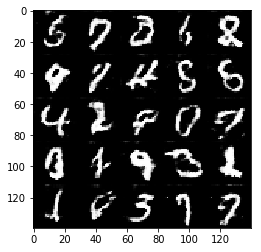

Epoch 2/2 Step 2210... Discriminator Loss: 1.0682... Generator Loss: 1.0515   difference (D-G): 0.0168
Epoch 2/2 Step 2220... Discriminator Loss: 0.5710... Generator Loss: 1.8040   difference (D-G): -1.2330
Epoch 2/2 Step 2230... Discriminator Loss: 0.6744... Generator Loss: 1.6593   difference (D-G): -0.9849
Epoch 2/2 Step 2240... Discriminator Loss: 0.7550... Generator Loss: 1.3495   difference (D-G): -0.5945
Epoch 2/2 Step 2250... Discriminator Loss: 0.7287... Generator Loss: 1.3598   difference (D-G): -0.6311
Epoch 2/2 Step 2260... Discriminator Loss: 0.8570... Generator Loss: 1.1361   difference (D-G): -0.2791
Epoch 2/2 Step 2270... Discriminator Loss: 1.5337... Generator Loss: 0.4658   difference (D-G): 1.0679
Epoch 2/2 Step 2280... Discriminator Loss: 0.6001... Generator Loss: 1.6576   difference (D-G): -1.0575
Epoch 2/2 Step 2290... Discriminator Loss: 0.8801... Generator Loss: 1.1297   difference (D-G): -0.2496
Epoch 2/2 Step 2300... Discriminator Loss: 0.5435... Generator Los

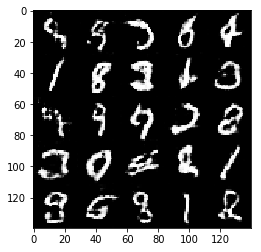

Epoch 2/2 Step 2310... Discriminator Loss: 3.7018... Generator Loss: 6.7319   difference (D-G): -3.0301
Epoch 2/2 Step 2320... Discriminator Loss: 0.5151... Generator Loss: 3.9605   difference (D-G): -3.4455
Epoch 2/2 Step 2330... Discriminator Loss: 1.1708... Generator Loss: 0.6432   difference (D-G): 0.5276
Epoch 2/2 Step 2340... Discriminator Loss: 0.8804... Generator Loss: 1.0348   difference (D-G): -0.1544
Epoch 2/2 Step 2350... Discriminator Loss: 0.5105... Generator Loss: 2.1344   difference (D-G): -1.6239
Epoch 2/2 Step 2360... Discriminator Loss: 0.8341... Generator Loss: 1.0387   difference (D-G): -0.2047
Epoch 2/2 Step 2370... Discriminator Loss: 0.8023... Generator Loss: 1.1196   difference (D-G): -0.3173
Epoch 2/2 Step 2380... Discriminator Loss: 1.0823... Generator Loss: 0.7631   difference (D-G): 0.3192
Epoch 2/2 Step 2390... Discriminator Loss: 1.8611... Generator Loss: 0.3703   difference (D-G): 1.4908
Epoch 2/2 Step 2400... Discriminator Loss: 0.5681... Generator Loss

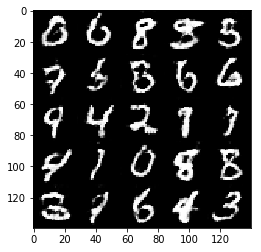

Epoch 2/2 Step 2410... Discriminator Loss: 0.7781... Generator Loss: 1.2326   difference (D-G): -0.4545
Epoch 2/2 Step 2420... Discriminator Loss: 0.4843... Generator Loss: 2.1883   difference (D-G): -1.7040
Epoch 2/2 Step 2430... Discriminator Loss: 0.6817... Generator Loss: 1.4137   difference (D-G): -0.7321
Epoch 2/2 Step 2440... Discriminator Loss: 0.7693... Generator Loss: 1.1653   difference (D-G): -0.3960
Epoch 2/2 Step 2450... Discriminator Loss: 1.8474... Generator Loss: 0.4591   difference (D-G): 1.3883
Epoch 2/2 Step 2460... Discriminator Loss: 0.7305... Generator Loss: 1.4483   difference (D-G): -0.7178
Epoch 2/2 Step 2470... Discriminator Loss: 0.9632... Generator Loss: 1.0197   difference (D-G): -0.0565
Epoch 2/2 Step 2480... Discriminator Loss: 0.4896... Generator Loss: 2.1334   difference (D-G): -1.6438
Epoch 2/2 Step 2490... Discriminator Loss: 1.0942... Generator Loss: 1.3230   difference (D-G): -0.2288
Epoch 2/2 Step 2500... Discriminator Loss: 0.8997... Generator Lo

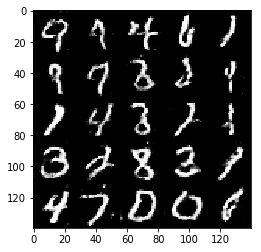

Epoch 2/2 Step 2510... Discriminator Loss: 1.1440... Generator Loss: 0.6787   difference (D-G): 0.4653
Epoch 2/2 Step 2520... Discriminator Loss: 1.2077... Generator Loss: 0.5590   difference (D-G): 0.6487
Epoch 2/2 Step 2530... Discriminator Loss: 0.5797... Generator Loss: 1.7834   difference (D-G): -1.2037
Epoch 2/2 Step 2540... Discriminator Loss: 0.9974... Generator Loss: 0.7424   difference (D-G): 0.2550
Epoch 2/2 Step 2550... Discriminator Loss: 1.2464... Generator Loss: 0.7083   difference (D-G): 0.5381
Epoch 2/2 Step 2560... Discriminator Loss: 1.6496... Generator Loss: 0.4795   difference (D-G): 1.1701
Epoch 2/2 Step 2570... Discriminator Loss: 0.7692... Generator Loss: 1.2542   difference (D-G): -0.4850
Epoch 2/2 Step 2580... Discriminator Loss: 2.7930... Generator Loss: 5.4750   difference (D-G): -2.6819
Epoch 2/2 Step 2590... Discriminator Loss: 0.5051... Generator Loss: 2.1346   difference (D-G): -1.6295
Epoch 2/2 Step 2600... Discriminator Loss: 0.9814... Generator Loss: 

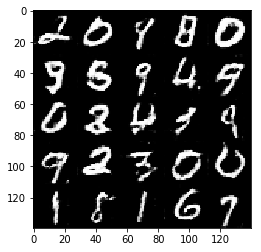

Epoch 2/2 Step 2610... Discriminator Loss: 1.3981... Generator Loss: 0.5730   difference (D-G): 0.8251
Epoch 2/2 Step 2620... Discriminator Loss: 0.7142... Generator Loss: 1.2585   difference (D-G): -0.5443
Epoch 2/2 Step 2630... Discriminator Loss: 1.0420... Generator Loss: 1.0662   difference (D-G): -0.0243
Epoch 2/2 Step 2640... Discriminator Loss: 0.5981... Generator Loss: 1.5579   difference (D-G): -0.9599
Epoch 2/2 Step 2650... Discriminator Loss: 0.7691... Generator Loss: 1.4516   difference (D-G): -0.6826
Epoch 2/2 Step 2660... Discriminator Loss: 0.7975... Generator Loss: 1.3106   difference (D-G): -0.5130
Epoch 2/2 Step 2670... Discriminator Loss: 0.5622... Generator Loss: 1.9101   difference (D-G): -1.3478
Epoch 2/2 Step 2680... Discriminator Loss: 0.5372... Generator Loss: 1.9275   difference (D-G): -1.3902
Epoch 2/2 Step 2690... Discriminator Loss: 1.5816... Generator Loss: 0.5833   difference (D-G): 0.9983
Epoch 2/2 Step 2700... Discriminator Loss: 2.5480... Generator Los

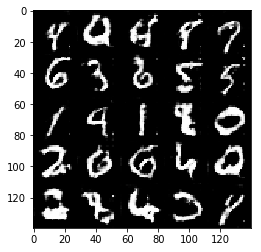

Epoch 2/2 Step 2710... Discriminator Loss: 0.5372... Generator Loss: 1.8838   difference (D-G): -1.3466
Epoch 2/2 Step 2720... Discriminator Loss: 0.9205... Generator Loss: 0.9207   difference (D-G): -0.0002
Epoch 2/2 Step 2730... Discriminator Loss: 0.5009... Generator Loss: 2.1310   difference (D-G): -1.6301
Epoch 2/2 Step 2740... Discriminator Loss: 0.8633... Generator Loss: 3.2686   difference (D-G): -2.4053
Epoch 2/2 Step 2750... Discriminator Loss: 0.6110... Generator Loss: 1.7323   difference (D-G): -1.1213
Epoch 2/2 Step 2760... Discriminator Loss: 1.3472... Generator Loss: 0.5863   difference (D-G): 0.7608
Epoch 2/2 Step 2770... Discriminator Loss: 0.5194... Generator Loss: 2.1018   difference (D-G): -1.5824
Epoch 2/2 Step 2780... Discriminator Loss: 0.5499... Generator Loss: 1.8954   difference (D-G): -1.3455
Epoch 2/2 Step 2790... Discriminator Loss: 0.7554... Generator Loss: 1.1949   difference (D-G): -0.4395
Epoch 2/2 Step 2800... Discriminator Loss: 0.4616... Generator Lo

Epoch 2/2 Step 2810... Discriminator Loss: 0.4705... Generator Loss: 2.2971   difference (D-G): -1.8265
Epoch 2/2 Step 2820... Discriminator Loss: 0.3908... Generator Loss: 3.2773   difference (D-G): -2.8865
Epoch 2/2 Step 2830... Discriminator Loss: 1.5632... Generator Loss: 0.4356   difference (D-G): 1.1275
Epoch 2/2 Step 2840... Discriminator Loss: 1.6682... Generator Loss: 0.4451   difference (D-G): 1.2231
Epoch 2/2 Step 2850... Discriminator Loss: 0.5819... Generator Loss: 1.9148   difference (D-G): -1.3329
Epoch 2/2 Step 2860... Discriminator Loss: 0.6991... Generator Loss: 1.7870   difference (D-G): -1.0879
Epoch 2/2 Step 2870... Discriminator Loss: 1.2423... Generator Loss: 0.9368   difference (D-G): 0.3055
Epoch 2/2 Step 2880... Discriminator Loss: 0.4840... Generator Loss: 2.1613   difference (D-G): -1.6773
Epoch 2/2 Step 2890... Discriminator Loss: 0.5184... Generator Loss: 2.0993   difference (D-G): -1.5808
Epoch 2/2 Step 2900... Discriminator Loss: 0.4870... Generator Loss

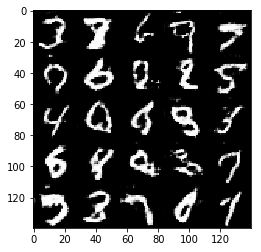

Epoch 2/2 Step 2910... Discriminator Loss: 0.6279... Generator Loss: 1.7703   difference (D-G): -1.1424
Epoch 2/2 Step 2920... Discriminator Loss: 0.4189... Generator Loss: 2.8459   difference (D-G): -2.4270
Epoch 2/2 Step 2930... Discriminator Loss: 0.5040... Generator Loss: 1.9705   difference (D-G): -1.4665
Epoch 2/2 Step 2940... Discriminator Loss: 0.6285... Generator Loss: 1.5613   difference (D-G): -0.9328
Epoch 2/2 Step 2950... Discriminator Loss: 0.5482... Generator Loss: 2.9069   difference (D-G): -2.3587
Epoch 2/2 Step 2960... Discriminator Loss: 0.6298... Generator Loss: 1.4629   difference (D-G): -0.8332
Epoch 2/2 Step 2970... Discriminator Loss: 0.8203... Generator Loss: 2.3214   difference (D-G): -1.5012
Epoch 2/2 Step 2980... Discriminator Loss: 0.6675... Generator Loss: 2.4257   difference (D-G): -1.7582
Epoch 2/2 Step 2990... Discriminator Loss: 2.1094... Generator Loss: 0.2699   difference (D-G): 1.8395
Epoch 2/2 Step 3000... Discriminator Loss: 1.2094... Generator Lo

Epoch 2/2 Step 3010... Discriminator Loss: 0.4048... Generator Loss: 4.1036   difference (D-G): -3.6988
Epoch 2/2 Step 3020... Discriminator Loss: 0.7561... Generator Loss: 1.1897   difference (D-G): -0.4337
Epoch 2/2 Step 3030... Discriminator Loss: 0.7534... Generator Loss: 1.2779   difference (D-G): -0.5245
Epoch 2/2 Step 3040... Discriminator Loss: 0.6923... Generator Loss: 1.5179   difference (D-G): -0.8256
Epoch 2/2 Step 3050... Discriminator Loss: 1.8742... Generator Loss: 5.7493   difference (D-G): -3.8751
Epoch 2/2 Step 3060... Discriminator Loss: 0.7800... Generator Loss: 1.4012   difference (D-G): -0.6212
Epoch 2/2 Step 3070... Discriminator Loss: 0.4058... Generator Loss: 2.8549   difference (D-G): -2.4490
Epoch 2/2 Step 3080... Discriminator Loss: 0.4951... Generator Loss: 2.9277   difference (D-G): -2.4326
Epoch 2/2 Step 3090... Discriminator Loss: 0.7935... Generator Loss: 1.1859   difference (D-G): -0.3925
Epoch 2/2 Step 3100... Discriminator Loss: 0.5457... Generator L

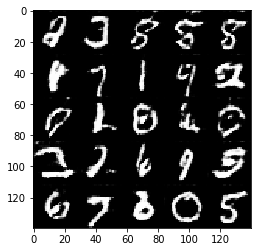

Epoch 2/2 Step 3110... Discriminator Loss: 0.4415... Generator Loss: 2.4824   difference (D-G): -2.0409
Epoch 2/2 Step 3120... Discriminator Loss: 0.4676... Generator Loss: 3.4541   difference (D-G): -2.9865
Epoch 2/2 Step 3130... Discriminator Loss: 1.3483... Generator Loss: 0.5697   difference (D-G): 0.7785
Epoch 2/2 Step 3140... Discriminator Loss: 0.8149... Generator Loss: 1.3652   difference (D-G): -0.5502
Epoch 2/2 Step 3150... Discriminator Loss: 0.5294... Generator Loss: 2.3996   difference (D-G): -1.8703
Epoch 2/2 Step 3160... Discriminator Loss: 0.7158... Generator Loss: 1.5081   difference (D-G): -0.7922
Epoch 2/2 Step 3170... Discriminator Loss: 1.3702... Generator Loss: 0.5500   difference (D-G): 0.8202
Epoch 2/2 Step 3180... Discriminator Loss: 0.6672... Generator Loss: 1.4898   difference (D-G): -0.8227
Epoch 2/2 Step 3190... Discriminator Loss: 0.7059... Generator Loss: 1.5305   difference (D-G): -0.8246
Epoch 2/2 Step 3200... Discriminator Loss: 0.8782... Generator Los

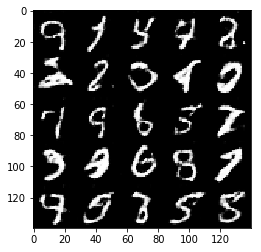

Epoch 2/2 Step 3210... Discriminator Loss: 0.5361... Generator Loss: 1.8799   difference (D-G): -1.3438
Epoch 2/2 Step 3220... Discriminator Loss: 0.9178... Generator Loss: 0.9581   difference (D-G): -0.0402
Epoch 2/2 Step 3230... Discriminator Loss: 0.4708... Generator Loss: 2.3824   difference (D-G): -1.9117
Epoch 2/2 Step 3240... Discriminator Loss: 0.9090... Generator Loss: 1.0112   difference (D-G): -0.1022
Epoch 2/2 Step 3250... Discriminator Loss: 0.7115... Generator Loss: 1.4546   difference (D-G): -0.7431
Epoch 2/2 Step 3260... Discriminator Loss: 0.5401... Generator Loss: 1.8842   difference (D-G): -1.3441
Epoch 2/2 Step 3270... Discriminator Loss: 0.5191... Generator Loss: 3.6146   difference (D-G): -3.0954
Epoch 2/2 Step 3280... Discriminator Loss: 0.8231... Generator Loss: 1.2764   difference (D-G): -0.4533
Epoch 2/2 Step 3290... Discriminator Loss: 1.1988... Generator Loss: 0.6727   difference (D-G): 0.5261
Epoch 2/2 Step 3300... Discriminator Loss: 0.9678... Generator Lo

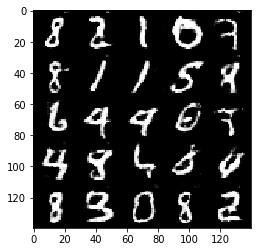

Epoch 2/2 Step 3310... Discriminator Loss: 0.4412... Generator Loss: 2.4177   difference (D-G): -1.9765
Epoch 2/2 Step 3320... Discriminator Loss: 0.4959... Generator Loss: 1.9891   difference (D-G): -1.4932
Epoch 2/2 Step 3330... Discriminator Loss: 1.0536... Generator Loss: 1.1944   difference (D-G): -0.1409
Epoch 2/2 Step 3340... Discriminator Loss: 2.6183... Generator Loss: 0.2392   difference (D-G): 2.3791
Epoch 2/2 Step 3350... Discriminator Loss: 0.9020... Generator Loss: 1.1000   difference (D-G): -0.1980
Epoch 2/2 Step 3360... Discriminator Loss: 0.7568... Generator Loss: 1.2352   difference (D-G): -0.4784
Epoch 2/2 Step 3370... Discriminator Loss: 0.6137... Generator Loss: 1.6354   difference (D-G): -1.0217
Epoch 2/2 Step 3380... Discriminator Loss: 0.5680... Generator Loss: 1.8002   difference (D-G): -1.2321
Epoch 2/2 Step 3390... Discriminator Loss: 0.7474... Generator Loss: 1.3918   difference (D-G): -0.6444
Epoch 2/2 Step 3400... Discriminator Loss: 0.7548... Generator Lo

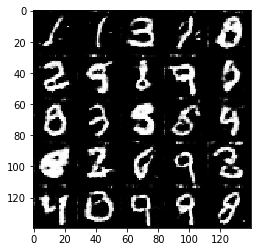

Epoch 2/2 Step 3410... Discriminator Loss: 0.7573... Generator Loss: 1.6508   difference (D-G): -0.8935
Epoch 2/2 Step 3420... Discriminator Loss: 0.6432... Generator Loss: 1.7001   difference (D-G): -1.0569
Epoch 2/2 Step 3430... Discriminator Loss: 0.5948... Generator Loss: 1.5311   difference (D-G): -0.9363
Epoch 2/2 Step 3440... Discriminator Loss: 0.7582... Generator Loss: 1.1427   difference (D-G): -0.3845
Epoch 2/2 Step 3450... Discriminator Loss: 0.4782... Generator Loss: 2.4206   difference (D-G): -1.9424
Epoch 2/2 Step 3460... Discriminator Loss: 0.3818... Generator Loss: 3.1286   difference (D-G): -2.7469
Epoch 2/2 Step 3470... Discriminator Loss: 0.4627... Generator Loss: 2.3767   difference (D-G): -1.9140
Epoch 2/2 Step 3480... Discriminator Loss: 0.7174... Generator Loss: 1.2132   difference (D-G): -0.4958
Epoch 2/2 Step 3490... Discriminator Loss: 1.5845... Generator Loss: 0.5132   difference (D-G): 1.0713
Epoch 2/2 Step 3500... Discriminator Loss: 0.4739... Generator Lo

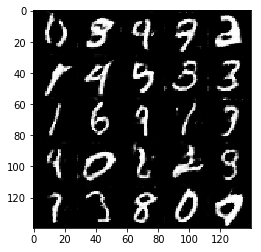

Epoch 2/2 Step 3510... Discriminator Loss: 1.8204... Generator Loss: 0.3932   difference (D-G): 1.4272
Epoch 2/2 Step 3520... Discriminator Loss: 1.7753... Generator Loss: 0.3276   difference (D-G): 1.4477
Epoch 2/2 Step 3530... Discriminator Loss: 1.0968... Generator Loss: 0.7485   difference (D-G): 0.3484
Epoch 2/2 Step 3540... Discriminator Loss: 1.0666... Generator Loss: 0.7551   difference (D-G): 0.3115
Epoch 2/2 Step 3550... Discriminator Loss: 0.5415... Generator Loss: 2.1567   difference (D-G): -1.6152
Epoch 2/2 Step 3560... Discriminator Loss: 0.8058... Generator Loss: 1.4280   difference (D-G): -0.6222
Epoch 2/2 Step 3570... Discriminator Loss: 0.6960... Generator Loss: 1.5289   difference (D-G): -0.8329
Epoch 2/2 Step 3580... Discriminator Loss: 0.5413... Generator Loss: 3.8215   difference (D-G): -3.2802
Epoch 2/2 Step 3590... Discriminator Loss: 0.5600... Generator Loss: 1.7305   difference (D-G): -1.1705
Epoch 2/2 Step 3600... Discriminator Loss: 0.4329... Generator Loss:

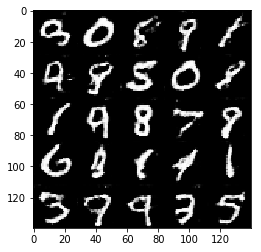

Epoch 2/2 Step 3610... Discriminator Loss: 0.5240... Generator Loss: 2.0831   difference (D-G): -1.5591
Epoch 2/2 Step 3620... Discriminator Loss: 0.5638... Generator Loss: 1.9458   difference (D-G): -1.3820
Epoch 2/2 Step 3630... Discriminator Loss: 0.7531... Generator Loss: 1.2583   difference (D-G): -0.5053
Epoch 2/2 Step 3640... Discriminator Loss: 0.7440... Generator Loss: 1.3540   difference (D-G): -0.6100
Epoch 2/2 Step 3650... Discriminator Loss: 0.5343... Generator Loss: 1.9385   difference (D-G): -1.4041
Epoch 2/2 Step 3660... Discriminator Loss: 0.7832... Generator Loss: 1.1863   difference (D-G): -0.4031
Epoch 2/2 Step 3670... Discriminator Loss: 1.4491... Generator Loss: 0.5492   difference (D-G): 0.8999
Epoch 2/2 Step 3680... Discriminator Loss: 0.9927... Generator Loss: 0.8548   difference (D-G): 0.1380
Epoch 2/2 Step 3690... Discriminator Loss: 0.7596... Generator Loss: 1.3660   difference (D-G): -0.6064
Epoch 2/2 Step 3700... Discriminator Loss: 0.5542... Generator Los

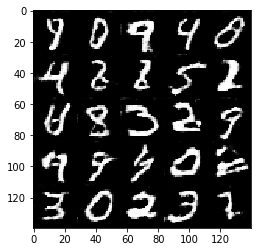

Epoch 2/2 Step 3710... Discriminator Loss: 0.4312... Generator Loss: 2.7768   difference (D-G): -2.3455
Epoch 2/2 Step 3720... Discriminator Loss: 0.6130... Generator Loss: 1.5796   difference (D-G): -0.9666
Epoch 2/2 Step 3730... Discriminator Loss: 1.2783... Generator Loss: 0.7442   difference (D-G): 0.5341
Epoch 2/2 Step 3740... Discriminator Loss: 0.7162... Generator Loss: 1.3753   difference (D-G): -0.6591
Epoch 2/2 Step 3750... Discriminator Loss: 0.7885... Generator Loss: 1.0685   difference (D-G): -0.2799


In [60]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 Step 10... Discriminator Loss: 0.5445... Generator Loss: 5.1051   difference (D-G): -4.5606
Epoch 1/1 Step 20... Discriminator Loss: 0.5714... Generator Loss: 16.2130   difference (D-G): -15.6416
Epoch 1/1 Step 30... Discriminator Loss: 2.0350... Generator Loss: 0.2799   difference (D-G): 1.7551
Epoch 1/1 Step 40... Discriminator Loss: 0.7470... Generator Loss: 4.5765   difference (D-G): -3.8295
Epoch 1/1 Step 50... Discriminator Loss: 0.4210... Generator Loss: 6.6273   difference (D-G): -6.2064
Epoch 1/1 Step 60... Discriminator Loss: 2.1660... Generator Loss: 0.2389   difference (D-G): 1.9271
Epoch 1/1 Step 70... Discriminator Loss: 0.4029... Generator Loss: 7.9308   difference (D-G): -7.5280
Epoch 1/1 Step 80... Discriminator Loss: 0.3661... Generator Loss: 5.1350   difference (D-G): -4.7688
Epoch 1/1 Step 90... Discriminator Loss: 0.4737... Generator Loss: 2.6511   difference (D-G): -2.1774
Epoch 1/1 Step 100... Discriminator Loss: 0.4326... Generator Loss: 2.7673   diffe

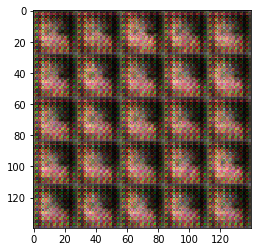

Epoch 1/1 Step 110... Discriminator Loss: 0.5811... Generator Loss: 1.9378   difference (D-G): -1.3567
Epoch 1/1 Step 120... Discriminator Loss: 0.6052... Generator Loss: 2.2542   difference (D-G): -1.6490
Epoch 1/1 Step 130... Discriminator Loss: 0.4063... Generator Loss: 3.5241   difference (D-G): -3.1178
Epoch 1/1 Step 140... Discriminator Loss: 1.5975... Generator Loss: 0.5474   difference (D-G): 1.0501
Epoch 1/1 Step 150... Discriminator Loss: 1.3703... Generator Loss: 2.1473   difference (D-G): -0.7770
Epoch 1/1 Step 160... Discriminator Loss: 0.4713... Generator Loss: 4.4803   difference (D-G): -4.0090
Epoch 1/1 Step 170... Discriminator Loss: 0.5982... Generator Loss: 2.0545   difference (D-G): -1.4563
Epoch 1/1 Step 180... Discriminator Loss: 0.5555... Generator Loss: 1.8702   difference (D-G): -1.3147
Epoch 1/1 Step 190... Discriminator Loss: 0.6066... Generator Loss: 1.8889   difference (D-G): -1.2822
Epoch 1/1 Step 200... Discriminator Loss: 0.4810... Generator Loss: 3.3840

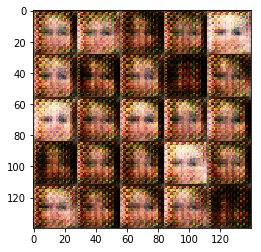

Epoch 1/1 Step 210... Discriminator Loss: 0.6455... Generator Loss: 1.4607   difference (D-G): -0.8152
Epoch 1/1 Step 220... Discriminator Loss: 0.8643... Generator Loss: 2.7251   difference (D-G): -1.8609
Epoch 1/1 Step 230... Discriminator Loss: 0.9520... Generator Loss: 0.8995   difference (D-G): 0.0524
Epoch 1/1 Step 240... Discriminator Loss: 1.3511... Generator Loss: 0.7066   difference (D-G): 0.6445
Epoch 1/1 Step 250... Discriminator Loss: 0.7860... Generator Loss: 1.9206   difference (D-G): -1.1346
Epoch 1/1 Step 260... Discriminator Loss: 1.7514... Generator Loss: 0.3824   difference (D-G): 1.3691
Epoch 1/1 Step 270... Discriminator Loss: 0.7815... Generator Loss: 1.5667   difference (D-G): -0.7852
Epoch 1/1 Step 280... Discriminator Loss: 1.4729... Generator Loss: 0.6000   difference (D-G): 0.8729
Epoch 1/1 Step 290... Discriminator Loss: 0.4881... Generator Loss: 2.9187   difference (D-G): -2.4306
Epoch 1/1 Step 300... Discriminator Loss: 0.5438... Generator Loss: 4.2306   

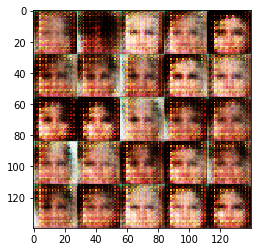

Epoch 1/1 Step 310... Discriminator Loss: 1.0529... Generator Loss: 0.8567   difference (D-G): 0.1962
Epoch 1/1 Step 320... Discriminator Loss: 1.1849... Generator Loss: 0.8168   difference (D-G): 0.3681
Epoch 1/1 Step 330... Discriminator Loss: 0.6325... Generator Loss: 1.7704   difference (D-G): -1.1379
Epoch 1/1 Step 340... Discriminator Loss: 0.7665... Generator Loss: 1.3161   difference (D-G): -0.5496
Epoch 1/1 Step 350... Discriminator Loss: 1.5265... Generator Loss: 0.4161   difference (D-G): 1.1104
Epoch 1/1 Step 360... Discriminator Loss: 0.6921... Generator Loss: 2.1413   difference (D-G): -1.4491
Epoch 1/1 Step 370... Discriminator Loss: 0.6786... Generator Loss: 2.4539   difference (D-G): -1.7753
Epoch 1/1 Step 380... Discriminator Loss: 0.6531... Generator Loss: 2.2428   difference (D-G): -1.5896
Epoch 1/1 Step 390... Discriminator Loss: 0.8974... Generator Loss: 4.4198   difference (D-G): -3.5224
Epoch 1/1 Step 400... Discriminator Loss: 0.7989... Generator Loss: 1.7558  

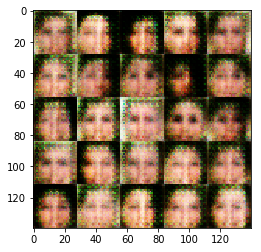

Epoch 1/1 Step 410... Discriminator Loss: 1.4297... Generator Loss: 0.4539   difference (D-G): 0.9759
Epoch 1/1 Step 420... Discriminator Loss: 0.8158... Generator Loss: 1.3169   difference (D-G): -0.5011
Epoch 1/1 Step 430... Discriminator Loss: 1.7433... Generator Loss: 0.3616   difference (D-G): 1.3817
Epoch 1/1 Step 440... Discriminator Loss: 0.7689... Generator Loss: 1.2931   difference (D-G): -0.5242
Epoch 1/1 Step 450... Discriminator Loss: 0.9099... Generator Loss: 1.0286   difference (D-G): -0.1186
Epoch 1/1 Step 460... Discriminator Loss: 2.2593... Generator Loss: 0.1869   difference (D-G): 2.0724
Epoch 1/1 Step 470... Discriminator Loss: 0.6707... Generator Loss: 1.6861   difference (D-G): -1.0154
Epoch 1/1 Step 480... Discriminator Loss: 1.0068... Generator Loss: 4.8009   difference (D-G): -3.7942
Epoch 1/1 Step 490... Discriminator Loss: 0.6412... Generator Loss: 2.3327   difference (D-G): -1.6916
Epoch 1/1 Step 500... Discriminator Loss: 1.9039... Generator Loss: 0.3102  

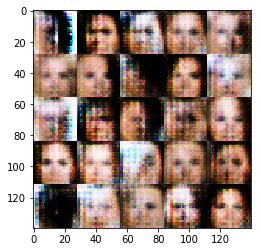

Epoch 1/1 Step 510... Discriminator Loss: 1.5002... Generator Loss: 0.4213   difference (D-G): 1.0789
Epoch 1/1 Step 520... Discriminator Loss: 1.7303... Generator Loss: 0.3554   difference (D-G): 1.3749
Epoch 1/1 Step 530... Discriminator Loss: 1.5634... Generator Loss: 0.4501   difference (D-G): 1.1133
Epoch 1/1 Step 540... Discriminator Loss: 0.7393... Generator Loss: 1.2615   difference (D-G): -0.5222
Epoch 1/1 Step 550... Discriminator Loss: 0.5732... Generator Loss: 2.4466   difference (D-G): -1.8734
Epoch 1/1 Step 560... Discriminator Loss: 0.6913... Generator Loss: 2.4306   difference (D-G): -1.7394
Epoch 1/1 Step 570... Discriminator Loss: 0.9093... Generator Loss: 1.3935   difference (D-G): -0.4842
Epoch 1/1 Step 580... Discriminator Loss: 1.7377... Generator Loss: 0.3667   difference (D-G): 1.3711
Epoch 1/1 Step 590... Discriminator Loss: 0.7523... Generator Loss: 1.7993   difference (D-G): -1.0470
Epoch 1/1 Step 600... Discriminator Loss: 0.9683... Generator Loss: 1.0417   

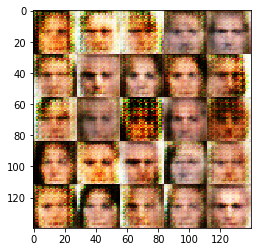

Epoch 1/1 Step 610... Discriminator Loss: 0.8301... Generator Loss: 1.1750   difference (D-G): -0.3449
Epoch 1/1 Step 620... Discriminator Loss: 2.3439... Generator Loss: 0.1796   difference (D-G): 2.1643
Epoch 1/1 Step 630... Discriminator Loss: 0.9115... Generator Loss: 1.1216   difference (D-G): -0.2101
Epoch 1/1 Step 640... Discriminator Loss: 0.8496... Generator Loss: 1.7240   difference (D-G): -0.8745
Epoch 1/1 Step 650... Discriminator Loss: 1.0100... Generator Loss: 0.8562   difference (D-G): 0.1539
Epoch 1/1 Step 660... Discriminator Loss: 1.7827... Generator Loss: 0.3153   difference (D-G): 1.4674
Epoch 1/1 Step 670... Discriminator Loss: 1.1353... Generator Loss: 1.4258   difference (D-G): -0.2904
Epoch 1/1 Step 680... Discriminator Loss: 1.5044... Generator Loss: 0.4384   difference (D-G): 1.0659
Epoch 1/1 Step 690... Discriminator Loss: 1.0574... Generator Loss: 0.8206   difference (D-G): 0.2368
Epoch 1/1 Step 700... Discriminator Loss: 1.0785... Generator Loss: 1.0562   d

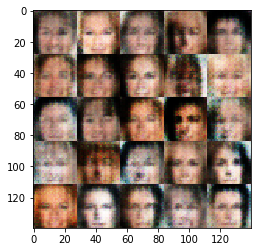

Epoch 1/1 Step 710... Discriminator Loss: 0.8741... Generator Loss: 1.7596   difference (D-G): -0.8855
Epoch 1/1 Step 720... Discriminator Loss: 1.1807... Generator Loss: 0.8701   difference (D-G): 0.3106
Epoch 1/1 Step 730... Discriminator Loss: 1.1340... Generator Loss: 2.1351   difference (D-G): -1.0011
Epoch 1/1 Step 740... Discriminator Loss: 0.8225... Generator Loss: 1.2363   difference (D-G): -0.4138
Epoch 1/1 Step 750... Discriminator Loss: 1.0370... Generator Loss: 2.1524   difference (D-G): -1.1154
Epoch 1/1 Step 760... Discriminator Loss: 1.0154... Generator Loss: 1.1607   difference (D-G): -0.1453
Epoch 1/1 Step 770... Discriminator Loss: 1.0753... Generator Loss: 0.7735   difference (D-G): 0.3018
Epoch 1/1 Step 780... Discriminator Loss: 0.8742... Generator Loss: 1.1492   difference (D-G): -0.2750
Epoch 1/1 Step 790... Discriminator Loss: 1.7571... Generator Loss: 0.3016   difference (D-G): 1.4555
Epoch 1/1 Step 800... Discriminator Loss: 1.0566... Generator Loss: 2.3749  

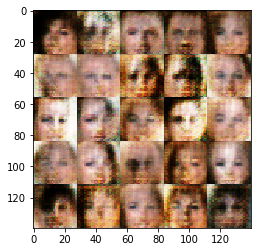

Epoch 1/1 Step 810... Discriminator Loss: 0.9707... Generator Loss: 0.8848   difference (D-G): 0.0859
Epoch 1/1 Step 820... Discriminator Loss: 0.8307... Generator Loss: 1.1130   difference (D-G): -0.2823
Epoch 1/1 Step 830... Discriminator Loss: 1.0775... Generator Loss: 2.0577   difference (D-G): -0.9803
Epoch 1/1 Step 840... Discriminator Loss: 1.7012... Generator Loss: 0.3740   difference (D-G): 1.3272
Epoch 1/1 Step 850... Discriminator Loss: 0.7404... Generator Loss: 1.5924   difference (D-G): -0.8519
Epoch 1/1 Step 860... Discriminator Loss: 1.1590... Generator Loss: 0.6520   difference (D-G): 0.5070
Epoch 1/1 Step 870... Discriminator Loss: 0.7905... Generator Loss: 1.6696   difference (D-G): -0.8791
Epoch 1/1 Step 880... Discriminator Loss: 0.9157... Generator Loss: 1.1264   difference (D-G): -0.2107
Epoch 1/1 Step 890... Discriminator Loss: 0.9144... Generator Loss: 1.6258   difference (D-G): -0.7114
Epoch 1/1 Step 900... Discriminator Loss: 0.8427... Generator Loss: 1.5744  

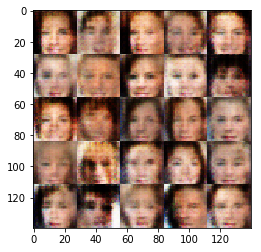

Epoch 1/1 Step 910... Discriminator Loss: 1.1308... Generator Loss: 1.8778   difference (D-G): -0.7470
Epoch 1/1 Step 920... Discriminator Loss: 1.1772... Generator Loss: 0.5773   difference (D-G): 0.5999
Epoch 1/1 Step 930... Discriminator Loss: 1.2918... Generator Loss: 0.6303   difference (D-G): 0.6615
Epoch 1/1 Step 940... Discriminator Loss: 1.5177... Generator Loss: 0.4089   difference (D-G): 1.1088
Epoch 1/1 Step 950... Discriminator Loss: 0.9445... Generator Loss: 1.5950   difference (D-G): -0.6505
Epoch 1/1 Step 960... Discriminator Loss: 0.9368... Generator Loss: 1.0708   difference (D-G): -0.1340
Epoch 1/1 Step 970... Discriminator Loss: 1.4401... Generator Loss: 0.4533   difference (D-G): 0.9868
Epoch 1/1 Step 980... Discriminator Loss: 1.0133... Generator Loss: 2.0578   difference (D-G): -1.0445
Epoch 1/1 Step 990... Discriminator Loss: 0.8696... Generator Loss: 1.6735   difference (D-G): -0.8040
Epoch 1/1 Step 1000... Discriminator Loss: 1.0454... Generator Loss: 0.8795  

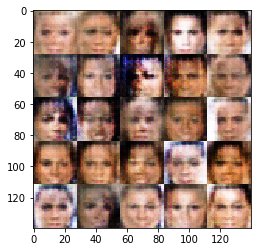

Epoch 1/1 Step 1010... Discriminator Loss: 0.8545... Generator Loss: 1.2882   difference (D-G): -0.4337
Epoch 1/1 Step 1020... Discriminator Loss: 1.0891... Generator Loss: 0.7406   difference (D-G): 0.3485
Epoch 1/1 Step 1030... Discriminator Loss: 0.9588... Generator Loss: 1.6905   difference (D-G): -0.7318
Epoch 1/1 Step 1040... Discriminator Loss: 1.3394... Generator Loss: 0.5061   difference (D-G): 0.8333
Epoch 1/1 Step 1050... Discriminator Loss: 0.9745... Generator Loss: 1.1379   difference (D-G): -0.1635
Epoch 1/1 Step 1060... Discriminator Loss: 0.8674... Generator Loss: 1.2200   difference (D-G): -0.3526
Epoch 1/1 Step 1070... Discriminator Loss: 1.0930... Generator Loss: 0.7382   difference (D-G): 0.3549
Epoch 1/1 Step 1080... Discriminator Loss: 0.9399... Generator Loss: 1.0439   difference (D-G): -0.1040
Epoch 1/1 Step 1090... Discriminator Loss: 1.0907... Generator Loss: 0.6865   difference (D-G): 0.4042
Epoch 1/1 Step 1100... Discriminator Loss: 1.0040... Generator Loss:

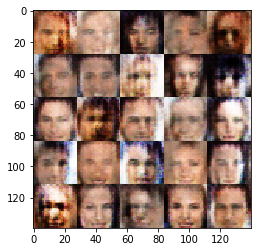

Epoch 1/1 Step 1110... Discriminator Loss: 0.9891... Generator Loss: 0.8391   difference (D-G): 0.1500
Epoch 1/1 Step 1120... Discriminator Loss: 1.0209... Generator Loss: 0.9450   difference (D-G): 0.0759
Epoch 1/1 Step 1130... Discriminator Loss: 1.4884... Generator Loss: 2.8852   difference (D-G): -1.3968
Epoch 1/1 Step 1140... Discriminator Loss: 0.9627... Generator Loss: 1.3341   difference (D-G): -0.3715
Epoch 1/1 Step 1150... Discriminator Loss: 0.8836... Generator Loss: 1.5774   difference (D-G): -0.6938
Epoch 1/1 Step 1160... Discriminator Loss: 1.2746... Generator Loss: 0.5688   difference (D-G): 0.7058
Epoch 1/1 Step 1170... Discriminator Loss: 1.1307... Generator Loss: 2.8245   difference (D-G): -1.6938
Epoch 1/1 Step 1180... Discriminator Loss: 0.9165... Generator Loss: 1.3692   difference (D-G): -0.4528
Epoch 1/1 Step 1190... Discriminator Loss: 0.9090... Generator Loss: 1.2458   difference (D-G): -0.3367
Epoch 1/1 Step 1200... Discriminator Loss: 0.7745... Generator Loss

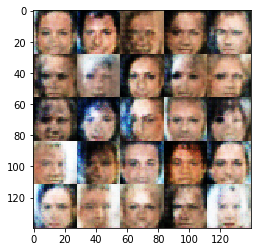

Epoch 1/1 Step 1210... Discriminator Loss: 0.7609... Generator Loss: 1.2581   difference (D-G): -0.4972
Epoch 1/1 Step 1220... Discriminator Loss: 0.7806... Generator Loss: 1.5348   difference (D-G): -0.7542
Epoch 1/1 Step 1230... Discriminator Loss: 1.0266... Generator Loss: 1.3315   difference (D-G): -0.3049
Epoch 1/1 Step 1240... Discriminator Loss: 0.8788... Generator Loss: 2.1669   difference (D-G): -1.2881
Epoch 1/1 Step 1250... Discriminator Loss: 0.8997... Generator Loss: 0.8824   difference (D-G): 0.0173
Epoch 1/1 Step 1260... Discriminator Loss: 1.0219... Generator Loss: 0.8817   difference (D-G): 0.1402
Epoch 1/1 Step 1270... Discriminator Loss: 1.0939... Generator Loss: 0.7438   difference (D-G): 0.3501
Epoch 1/1 Step 1280... Discriminator Loss: 0.7279... Generator Loss: 2.1126   difference (D-G): -1.3846
Epoch 1/1 Step 1290... Discriminator Loss: 1.2906... Generator Loss: 0.5468   difference (D-G): 0.7438
Epoch 1/1 Step 1300... Discriminator Loss: 0.9445... Generator Loss:

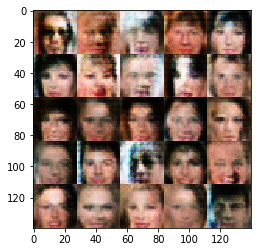

Epoch 1/1 Step 1310... Discriminator Loss: 1.1383... Generator Loss: 0.8094   difference (D-G): 0.3290
Epoch 1/1 Step 1320... Discriminator Loss: 1.0155... Generator Loss: 1.1190   difference (D-G): -0.1035
Epoch 1/1 Step 1330... Discriminator Loss: 0.9970... Generator Loss: 0.8600   difference (D-G): 0.1370
Epoch 1/1 Step 1340... Discriminator Loss: 1.0435... Generator Loss: 1.3853   difference (D-G): -0.3419
Epoch 1/1 Step 1350... Discriminator Loss: 1.0242... Generator Loss: 0.9144   difference (D-G): 0.1098
Epoch 1/1 Step 1360... Discriminator Loss: 1.0541... Generator Loss: 2.8123   difference (D-G): -1.7582
Epoch 1/1 Step 1370... Discriminator Loss: 1.0500... Generator Loss: 0.7782   difference (D-G): 0.2718
Epoch 1/1 Step 1380... Discriminator Loss: 1.3051... Generator Loss: 0.5151   difference (D-G): 0.7900
Epoch 1/1 Step 1390... Discriminator Loss: 1.0919... Generator Loss: 0.7838   difference (D-G): 0.3081
Epoch 1/1 Step 1400... Discriminator Loss: 1.1144... Generator Loss: 0

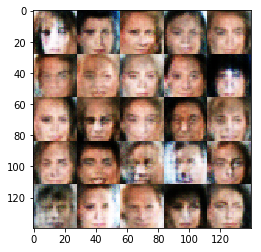

Epoch 1/1 Step 1410... Discriminator Loss: 1.1988... Generator Loss: 0.6652   difference (D-G): 0.5336
Epoch 1/1 Step 1420... Discriminator Loss: 0.9462... Generator Loss: 1.9138   difference (D-G): -0.9676
Epoch 1/1 Step 1430... Discriminator Loss: 2.3148... Generator Loss: 0.1709   difference (D-G): 2.1439
Epoch 1/1 Step 1440... Discriminator Loss: 0.6282... Generator Loss: 2.2547   difference (D-G): -1.6265
Epoch 1/1 Step 1450... Discriminator Loss: 1.2631... Generator Loss: 0.6070   difference (D-G): 0.6562
Epoch 1/1 Step 1460... Discriminator Loss: 1.2539... Generator Loss: 0.6306   difference (D-G): 0.6233
Epoch 1/1 Step 1470... Discriminator Loss: 1.1428... Generator Loss: 0.6498   difference (D-G): 0.4930
Epoch 1/1 Step 1480... Discriminator Loss: 1.0516... Generator Loss: 1.8611   difference (D-G): -0.8095
Epoch 1/1 Step 1490... Discriminator Loss: 0.8865... Generator Loss: 1.2705   difference (D-G): -0.3840
Epoch 1/1 Step 1500... Discriminator Loss: 1.4186... Generator Loss: 

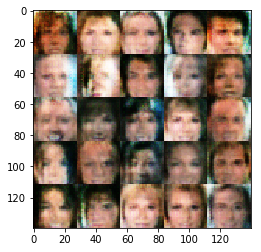

Epoch 1/1 Step 1510... Discriminator Loss: 0.7654... Generator Loss: 1.5073   difference (D-G): -0.7419
Epoch 1/1 Step 1520... Discriminator Loss: 1.1035... Generator Loss: 0.8568   difference (D-G): 0.2467
Epoch 1/1 Step 1530... Discriminator Loss: 0.9831... Generator Loss: 1.2930   difference (D-G): -0.3099
Epoch 1/1 Step 1540... Discriminator Loss: 0.7944... Generator Loss: 1.1337   difference (D-G): -0.3392
Epoch 1/1 Step 1550... Discriminator Loss: 0.9903... Generator Loss: 0.8745   difference (D-G): 0.1158
Epoch 1/1 Step 1560... Discriminator Loss: 0.8453... Generator Loss: 1.1172   difference (D-G): -0.2719
Epoch 1/1 Step 1570... Discriminator Loss: 0.9498... Generator Loss: 1.0653   difference (D-G): -0.1156
Epoch 1/1 Step 1580... Discriminator Loss: 0.9930... Generator Loss: 0.8443   difference (D-G): 0.1487
Epoch 1/1 Step 1590... Discriminator Loss: 1.5964... Generator Loss: 0.5575   difference (D-G): 1.0389
Epoch 1/1 Step 1600... Discriminator Loss: 1.4290... Generator Loss:

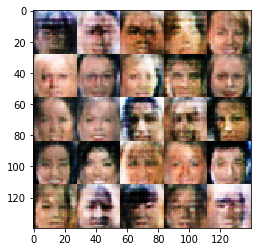

Epoch 1/1 Step 1610... Discriminator Loss: 0.7408... Generator Loss: 1.2381   difference (D-G): -0.4973
Epoch 1/1 Step 1620... Discriminator Loss: 1.1647... Generator Loss: 2.5598   difference (D-G): -1.3951
Epoch 1/1 Step 1630... Discriminator Loss: 0.7654... Generator Loss: 2.2321   difference (D-G): -1.4667
Epoch 1/1 Step 1640... Discriminator Loss: 0.9548... Generator Loss: 1.0114   difference (D-G): -0.0565
Epoch 1/1 Step 1650... Discriminator Loss: 1.0639... Generator Loss: 2.0022   difference (D-G): -0.9383
Epoch 1/1 Step 1660... Discriminator Loss: 1.4972... Generator Loss: 0.3963   difference (D-G): 1.1009
Epoch 1/1 Step 1670... Discriminator Loss: 1.0533... Generator Loss: 1.0723   difference (D-G): -0.0189
Epoch 1/1 Step 1680... Discriminator Loss: 0.8604... Generator Loss: 1.0402   difference (D-G): -0.1798
Epoch 1/1 Step 1690... Discriminator Loss: 0.7641... Generator Loss: 1.2943   difference (D-G): -0.5302
Epoch 1/1 Step 1700... Discriminator Loss: 0.7147... Generator Lo

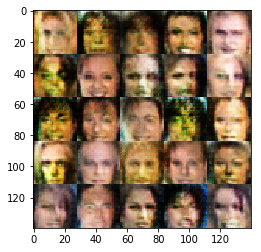

Epoch 1/1 Step 1710... Discriminator Loss: 0.9426... Generator Loss: 1.5163   difference (D-G): -0.5737
Epoch 1/1 Step 1720... Discriminator Loss: 1.1137... Generator Loss: 0.7368   difference (D-G): 0.3769
Epoch 1/1 Step 1730... Discriminator Loss: 1.0239... Generator Loss: 0.8669   difference (D-G): 0.1570
Epoch 1/1 Step 1740... Discriminator Loss: 1.3363... Generator Loss: 2.7532   difference (D-G): -1.4168
Epoch 1/1 Step 1750... Discriminator Loss: 1.3604... Generator Loss: 0.4757   difference (D-G): 0.8846
Epoch 1/1 Step 1760... Discriminator Loss: 0.8583... Generator Loss: 1.6930   difference (D-G): -0.8347
Epoch 1/1 Step 1770... Discriminator Loss: 1.1431... Generator Loss: 0.6851   difference (D-G): 0.4580
Epoch 1/1 Step 1780... Discriminator Loss: 0.8075... Generator Loss: 1.0346   difference (D-G): -0.2271
Epoch 1/1 Step 1790... Discriminator Loss: 1.0548... Generator Loss: 0.9191   difference (D-G): 0.1358
Epoch 1/1 Step 1800... Discriminator Loss: 1.3144... Generator Loss: 

Epoch 1/1 Step 1810... Discriminator Loss: 1.1617... Generator Loss: 0.6662   difference (D-G): 0.4955
Epoch 1/1 Step 1820... Discriminator Loss: 1.5332... Generator Loss: 0.3780   difference (D-G): 1.1552
Epoch 1/1 Step 1830... Discriminator Loss: 1.2139... Generator Loss: 0.6038   difference (D-G): 0.6101
Epoch 1/1 Step 1840... Discriminator Loss: 1.1367... Generator Loss: 0.6686   difference (D-G): 0.4682
Epoch 1/1 Step 1850... Discriminator Loss: 1.7362... Generator Loss: 0.3622   difference (D-G): 1.3740
Epoch 1/1 Step 1860... Discriminator Loss: 0.8334... Generator Loss: 1.1856   difference (D-G): -0.3522
Epoch 1/1 Step 1870... Discriminator Loss: 0.8580... Generator Loss: 1.3226   difference (D-G): -0.4646
Epoch 1/1 Step 1880... Discriminator Loss: 1.4473... Generator Loss: 0.4562   difference (D-G): 0.9911
Epoch 1/1 Step 1890... Discriminator Loss: 1.3277... Generator Loss: 0.5004   difference (D-G): 0.8273
Epoch 1/1 Step 1900... Discriminator Loss: 0.8071... Generator Loss: 1.

Epoch 1/1 Step 1910... Discriminator Loss: 1.6258... Generator Loss: 0.3532   difference (D-G): 1.2726
Epoch 1/1 Step 1920... Discriminator Loss: 0.7128... Generator Loss: 2.6134   difference (D-G): -1.9006
Epoch 1/1 Step 1930... Discriminator Loss: 1.1964... Generator Loss: 2.5842   difference (D-G): -1.3878
Epoch 1/1 Step 1940... Discriminator Loss: 1.7591... Generator Loss: 0.2846   difference (D-G): 1.4745
Epoch 1/1 Step 1950... Discriminator Loss: 1.4209... Generator Loss: 0.5174   difference (D-G): 0.9035
Epoch 1/1 Step 1960... Discriminator Loss: 1.2777... Generator Loss: 0.6002   difference (D-G): 0.6775
Epoch 1/1 Step 1970... Discriminator Loss: 1.2031... Generator Loss: 0.5851   difference (D-G): 0.6180
Epoch 1/1 Step 1980... Discriminator Loss: 1.1818... Generator Loss: 0.5876   difference (D-G): 0.5943
Epoch 1/1 Step 1990... Discriminator Loss: 1.3793... Generator Loss: 0.5866   difference (D-G): 0.7927
Epoch 1/1 Step 2000... Discriminator Loss: 1.5884... Generator Loss: 0.

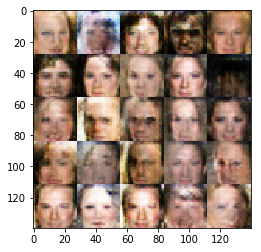

Epoch 1/1 Step 2010... Discriminator Loss: 0.6562... Generator Loss: 1.4817   difference (D-G): -0.8254
Epoch 1/1 Step 2020... Discriminator Loss: 0.8812... Generator Loss: 0.9453   difference (D-G): -0.0642
Epoch 1/1 Step 2030... Discriminator Loss: 0.9213... Generator Loss: 1.0974   difference (D-G): -0.1761
Epoch 1/1 Step 2040... Discriminator Loss: 1.5389... Generator Loss: 0.4493   difference (D-G): 1.0895
Epoch 1/1 Step 2050... Discriminator Loss: 1.0287... Generator Loss: 0.7778   difference (D-G): 0.2508
Epoch 1/1 Step 2060... Discriminator Loss: 0.8579... Generator Loss: 1.3572   difference (D-G): -0.4992
Epoch 1/1 Step 2070... Discriminator Loss: 1.3830... Generator Loss: 0.4596   difference (D-G): 0.9234
Epoch 1/1 Step 2080... Discriminator Loss: 0.8221... Generator Loss: 1.1885   difference (D-G): -0.3664
Epoch 1/1 Step 2090... Discriminator Loss: 1.1096... Generator Loss: 0.6816   difference (D-G): 0.4280
Epoch 1/1 Step 2100... Discriminator Loss: 0.9755... Generator Loss:

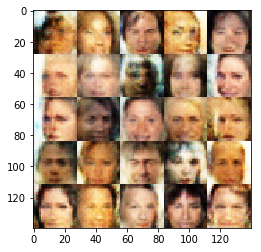

Epoch 1/1 Step 2110... Discriminator Loss: 0.9946... Generator Loss: 1.0855   difference (D-G): -0.0909
Epoch 1/1 Step 2120... Discriminator Loss: 0.9503... Generator Loss: 1.1059   difference (D-G): -0.1556
Epoch 1/1 Step 2130... Discriminator Loss: 1.2003... Generator Loss: 1.2233   difference (D-G): -0.0230
Epoch 1/1 Step 2140... Discriminator Loss: 0.9350... Generator Loss: 1.2303   difference (D-G): -0.2953
Epoch 1/1 Step 2150... Discriminator Loss: 0.7111... Generator Loss: 1.2188   difference (D-G): -0.5077
Epoch 1/1 Step 2160... Discriminator Loss: 0.6739... Generator Loss: 1.7862   difference (D-G): -1.1123
Epoch 1/1 Step 2170... Discriminator Loss: 0.9363... Generator Loss: 1.0800   difference (D-G): -0.1437
Epoch 1/1 Step 2180... Discriminator Loss: 1.0423... Generator Loss: 2.8132   difference (D-G): -1.7709
Epoch 1/1 Step 2190... Discriminator Loss: 0.5868... Generator Loss: 1.8066   difference (D-G): -1.2198
Epoch 1/1 Step 2200... Discriminator Loss: 0.9790... Generator L

Epoch 1/1 Step 2210... Discriminator Loss: 0.8364... Generator Loss: 1.1406   difference (D-G): -0.3043
Epoch 1/1 Step 2220... Discriminator Loss: 0.9626... Generator Loss: 0.8250   difference (D-G): 0.1375
Epoch 1/1 Step 2230... Discriminator Loss: 0.9913... Generator Loss: 0.8630   difference (D-G): 0.1283
Epoch 1/1 Step 2240... Discriminator Loss: 1.2760... Generator Loss: 0.6177   difference (D-G): 0.6583
Epoch 1/1 Step 2250... Discriminator Loss: 0.8101... Generator Loss: 1.1911   difference (D-G): -0.3810
Epoch 1/1 Step 2260... Discriminator Loss: 0.9899... Generator Loss: 1.3411   difference (D-G): -0.3512
Epoch 1/1 Step 2270... Discriminator Loss: 1.0683... Generator Loss: 0.9237   difference (D-G): 0.1446
Epoch 1/1 Step 2280... Discriminator Loss: 0.9205... Generator Loss: 1.3312   difference (D-G): -0.4107
Epoch 1/1 Step 2290... Discriminator Loss: 1.2731... Generator Loss: 0.6797   difference (D-G): 0.5934
Epoch 1/1 Step 2300... Discriminator Loss: 1.6119... Generator Loss: 

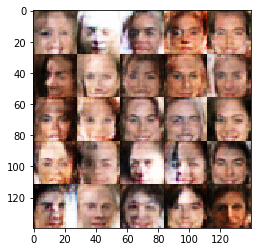

Epoch 1/1 Step 2310... Discriminator Loss: 1.0746... Generator Loss: 2.8941   difference (D-G): -1.8195
Epoch 1/1 Step 2320... Discriminator Loss: 1.0722... Generator Loss: 1.4465   difference (D-G): -0.3743
Epoch 1/1 Step 2330... Discriminator Loss: 1.2130... Generator Loss: 0.6273   difference (D-G): 0.5857
Epoch 1/1 Step 2340... Discriminator Loss: 1.0733... Generator Loss: 0.7157   difference (D-G): 0.3576
Epoch 1/1 Step 2350... Discriminator Loss: 0.8926... Generator Loss: 1.0143   difference (D-G): -0.1217
Epoch 1/1 Step 2360... Discriminator Loss: 0.7566... Generator Loss: 1.5949   difference (D-G): -0.8383
Epoch 1/1 Step 2370... Discriminator Loss: 1.4679... Generator Loss: 0.4520   difference (D-G): 1.0159
Epoch 1/1 Step 2380... Discriminator Loss: 1.5742... Generator Loss: 0.3758   difference (D-G): 1.1984
Epoch 1/1 Step 2390... Discriminator Loss: 0.7540... Generator Loss: 1.4316   difference (D-G): -0.6775
Epoch 1/1 Step 2400... Discriminator Loss: 1.1731... Generator Loss:

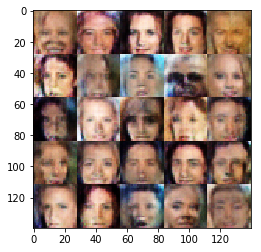

Epoch 1/1 Step 2410... Discriminator Loss: 1.4929... Generator Loss: 0.4349   difference (D-G): 1.0581
Epoch 1/1 Step 2420... Discriminator Loss: 0.7829... Generator Loss: 1.0928   difference (D-G): -0.3099
Epoch 1/1 Step 2430... Discriminator Loss: 1.4116... Generator Loss: 0.4487   difference (D-G): 0.9629
Epoch 1/1 Step 2440... Discriminator Loss: 0.8916... Generator Loss: 1.2448   difference (D-G): -0.3532
Epoch 1/1 Step 2450... Discriminator Loss: 0.7532... Generator Loss: 1.3958   difference (D-G): -0.6427
Epoch 1/1 Step 2460... Discriminator Loss: 1.7991... Generator Loss: 0.3158   difference (D-G): 1.4832
Epoch 1/1 Step 2470... Discriminator Loss: 2.1894... Generator Loss: 0.2191   difference (D-G): 1.9703
Epoch 1/1 Step 2480... Discriminator Loss: 1.2469... Generator Loss: 0.5942   difference (D-G): 0.6527
Epoch 1/1 Step 2490... Discriminator Loss: 1.6925... Generator Loss: 0.3087   difference (D-G): 1.3839
Epoch 1/1 Step 2500... Discriminator Loss: 0.6707... Generator Loss: 1

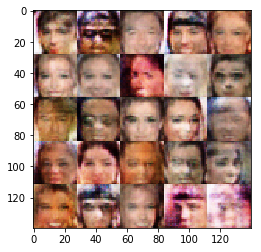

Epoch 1/1 Step 2510... Discriminator Loss: 1.2077... Generator Loss: 2.0773   difference (D-G): -0.8696
Epoch 1/1 Step 2520... Discriminator Loss: 0.9030... Generator Loss: 1.0492   difference (D-G): -0.1462
Epoch 1/1 Step 2530... Discriminator Loss: 1.4796... Generator Loss: 0.4738   difference (D-G): 1.0057
Epoch 1/1 Step 2540... Discriminator Loss: 1.4202... Generator Loss: 0.4474   difference (D-G): 0.9729
Epoch 1/1 Step 2550... Discriminator Loss: 0.9492... Generator Loss: 1.0547   difference (D-G): -0.1055
Epoch 1/1 Step 2560... Discriminator Loss: 2.0430... Generator Loss: 0.2073   difference (D-G): 1.8357
Epoch 1/1 Step 2570... Discriminator Loss: 1.6122... Generator Loss: 0.3496   difference (D-G): 1.2626
Epoch 1/1 Step 2580... Discriminator Loss: 0.9486... Generator Loss: 1.2377   difference (D-G): -0.2892
Epoch 1/1 Step 2590... Discriminator Loss: 1.0114... Generator Loss: 1.3431   difference (D-G): -0.3318
Epoch 1/1 Step 2600... Discriminator Loss: 1.0195... Generator Loss:

Epoch 1/1 Step 2610... Discriminator Loss: 2.4409... Generator Loss: 0.1564   difference (D-G): 2.2845
Epoch 1/1 Step 2620... Discriminator Loss: 1.0683... Generator Loss: 0.6709   difference (D-G): 0.3974
Epoch 1/1 Step 2630... Discriminator Loss: 1.2680... Generator Loss: 0.5135   difference (D-G): 0.7545
Epoch 1/1 Step 2640... Discriminator Loss: 1.4107... Generator Loss: 0.4731   difference (D-G): 0.9376
Epoch 1/1 Step 2650... Discriminator Loss: 1.7166... Generator Loss: 0.3244   difference (D-G): 1.3923
Epoch 1/1 Step 2660... Discriminator Loss: 1.3965... Generator Loss: 0.4516   difference (D-G): 0.9450
Epoch 1/1 Step 2670... Discriminator Loss: 2.3029... Generator Loss: 0.1564   difference (D-G): 2.1465
Epoch 1/1 Step 2680... Discriminator Loss: 1.5437... Generator Loss: 0.3946   difference (D-G): 1.1491
Epoch 1/1 Step 2690... Discriminator Loss: 1.0680... Generator Loss: 0.7105   difference (D-G): 0.3574
Epoch 1/1 Step 2700... Discriminator Loss: 0.9861... Generator Loss: 0.77

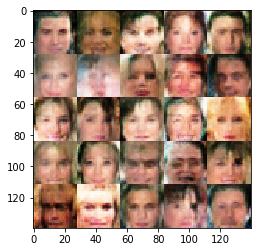

Epoch 1/1 Step 2710... Discriminator Loss: 0.8470... Generator Loss: 1.5628   difference (D-G): -0.7157
Epoch 1/1 Step 2720... Discriminator Loss: 1.4990... Generator Loss: 0.3974   difference (D-G): 1.1016
Epoch 1/1 Step 2730... Discriminator Loss: 1.0735... Generator Loss: 2.4676   difference (D-G): -1.3941
Epoch 1/1 Step 2740... Discriminator Loss: 1.7024... Generator Loss: 0.3136   difference (D-G): 1.3887
Epoch 1/1 Step 2750... Discriminator Loss: 0.9081... Generator Loss: 0.9322   difference (D-G): -0.0241
Epoch 1/1 Step 2760... Discriminator Loss: 1.6209... Generator Loss: 0.3626   difference (D-G): 1.2583
Epoch 1/1 Step 2770... Discriminator Loss: 0.8506... Generator Loss: 1.6616   difference (D-G): -0.8110
Epoch 1/1 Step 2780... Discriminator Loss: 0.8794... Generator Loss: 1.1456   difference (D-G): -0.2662
Epoch 1/1 Step 2790... Discriminator Loss: 1.1995... Generator Loss: 0.6500   difference (D-G): 0.5495
Epoch 1/1 Step 2800... Discriminator Loss: 0.8765... Generator Loss:

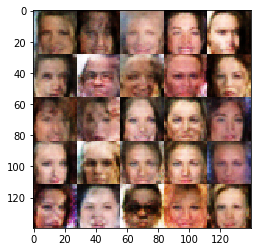

Epoch 1/1 Step 2810... Discriminator Loss: 0.9465... Generator Loss: 0.9001   difference (D-G): 0.0464
Epoch 1/1 Step 2820... Discriminator Loss: 1.3045... Generator Loss: 0.5359   difference (D-G): 0.7686
Epoch 1/1 Step 2830... Discriminator Loss: 0.9850... Generator Loss: 1.9419   difference (D-G): -0.9569
Epoch 1/1 Step 2840... Discriminator Loss: 1.3539... Generator Loss: 0.4902   difference (D-G): 0.8637
Epoch 1/1 Step 2850... Discriminator Loss: 0.8834... Generator Loss: 2.0430   difference (D-G): -1.1597
Epoch 1/1 Step 2860... Discriminator Loss: 1.3846... Generator Loss: 0.4730   difference (D-G): 0.9116
Epoch 1/1 Step 2870... Discriminator Loss: 2.2582... Generator Loss: 0.1668   difference (D-G): 2.0914
Epoch 1/1 Step 2880... Discriminator Loss: 1.0691... Generator Loss: 0.7035   difference (D-G): 0.3655
Epoch 1/1 Step 2890... Discriminator Loss: 1.3226... Generator Loss: 0.5109   difference (D-G): 0.8117
Epoch 1/1 Step 2900... Discriminator Loss: 1.1474... Generator Loss: 0.

Epoch 1/1 Step 2910... Discriminator Loss: 1.8089... Generator Loss: 0.3028   difference (D-G): 1.5061
Epoch 1/1 Step 2920... Discriminator Loss: 1.1121... Generator Loss: 0.9743   difference (D-G): 0.1377
Epoch 1/1 Step 2930... Discriminator Loss: 1.7650... Generator Loss: 0.2891   difference (D-G): 1.4759
Epoch 1/1 Step 2940... Discriminator Loss: 0.9438... Generator Loss: 0.8924   difference (D-G): 0.0514
Epoch 1/1 Step 2950... Discriminator Loss: 1.0660... Generator Loss: 0.7603   difference (D-G): 0.3058
Epoch 1/1 Step 2960... Discriminator Loss: 0.8995... Generator Loss: 2.5557   difference (D-G): -1.6563
Epoch 1/1 Step 2970... Discriminator Loss: 1.0983... Generator Loss: 0.8139   difference (D-G): 0.2845
Epoch 1/1 Step 2980... Discriminator Loss: 1.1720... Generator Loss: 0.6295   difference (D-G): 0.5425
Epoch 1/1 Step 2990... Discriminator Loss: 0.8528... Generator Loss: 1.6276   difference (D-G): -0.7748
Epoch 1/1 Step 3000... Discriminator Loss: 1.2485... Generator Loss: 0.

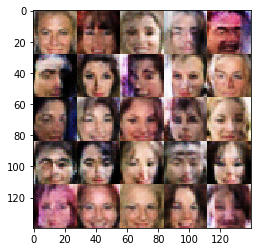

Epoch 1/1 Step 3010... Discriminator Loss: 0.8936... Generator Loss: 0.9660   difference (D-G): -0.0724
Epoch 1/1 Step 3020... Discriminator Loss: 1.5119... Generator Loss: 0.4452   difference (D-G): 1.0667
Epoch 1/1 Step 3030... Discriminator Loss: 1.3568... Generator Loss: 0.5860   difference (D-G): 0.7708
Epoch 1/1 Step 3040... Discriminator Loss: 1.6186... Generator Loss: 0.3746   difference (D-G): 1.2440
Epoch 1/1 Step 3050... Discriminator Loss: 1.4853... Generator Loss: 0.3952   difference (D-G): 1.0901
Epoch 1/1 Step 3060... Discriminator Loss: 0.7882... Generator Loss: 1.1807   difference (D-G): -0.3925
Epoch 1/1 Step 3070... Discriminator Loss: 1.0438... Generator Loss: 1.0648   difference (D-G): -0.0209
Epoch 1/1 Step 3080... Discriminator Loss: 1.4809... Generator Loss: 0.5317   difference (D-G): 0.9493
Epoch 1/1 Step 3090... Discriminator Loss: 1.1754... Generator Loss: 0.6189   difference (D-G): 0.5565
Epoch 1/1 Step 3100... Discriminator Loss: 0.8761... Generator Loss: 1

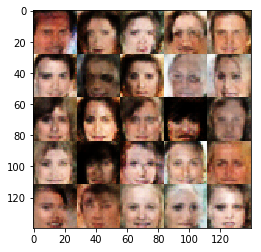

Epoch 1/1 Step 3110... Discriminator Loss: 1.2773... Generator Loss: 1.6707   difference (D-G): -0.3934
Epoch 1/1 Step 3120... Discriminator Loss: 1.9157... Generator Loss: 0.2838   difference (D-G): 1.6319
Epoch 1/1 Step 3130... Discriminator Loss: 1.0068... Generator Loss: 1.7406   difference (D-G): -0.7338
Epoch 1/1 Step 3140... Discriminator Loss: 1.0269... Generator Loss: 2.8512   difference (D-G): -1.8243
Epoch 1/1 Step 3150... Discriminator Loss: 1.1665... Generator Loss: 0.7259   difference (D-G): 0.4405
Epoch 1/1 Step 3160... Discriminator Loss: 0.9145... Generator Loss: 1.0444   difference (D-G): -0.1299
Epoch 1/1 Step 3170... Discriminator Loss: 1.1150... Generator Loss: 0.6940   difference (D-G): 0.4211
Epoch 1/1 Step 3180... Discriminator Loss: 1.1914... Generator Loss: 0.6506   difference (D-G): 0.5408
Epoch 1/1 Step 3190... Discriminator Loss: 0.6627... Generator Loss: 1.6339   difference (D-G): -0.9713
Epoch 1/1 Step 3200... Discriminator Loss: 0.6908... Generator Loss:

Epoch 1/1 Step 3210... Discriminator Loss: 1.5401... Generator Loss: 0.3725   difference (D-G): 1.1676
Epoch 1/1 Step 3220... Discriminator Loss: 1.4020... Generator Loss: 0.4839   difference (D-G): 0.9181
Epoch 1/1 Step 3230... Discriminator Loss: 0.9190... Generator Loss: 1.3808   difference (D-G): -0.4617
Epoch 1/1 Step 3240... Discriminator Loss: 0.7781... Generator Loss: 1.2552   difference (D-G): -0.4772
Epoch 1/1 Step 3250... Discriminator Loss: 0.9195... Generator Loss: 0.9500   difference (D-G): -0.0304
Epoch 1/1 Step 3260... Discriminator Loss: 1.0347... Generator Loss: 0.7184   difference (D-G): 0.3163
Epoch 1/1 Step 3270... Discriminator Loss: 1.7420... Generator Loss: 0.2904   difference (D-G): 1.4515
Epoch 1/1 Step 3280... Discriminator Loss: 1.4741... Generator Loss: 0.4285   difference (D-G): 1.0455
Epoch 1/1 Step 3290... Discriminator Loss: 1.8021... Generator Loss: 0.2719   difference (D-G): 1.5302
Epoch 1/1 Step 3300... Discriminator Loss: 0.8664... Generator Loss: 0

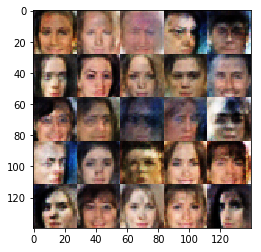

Epoch 1/1 Step 3310... Discriminator Loss: 1.1127... Generator Loss: 0.6472   difference (D-G): 0.4656
Epoch 1/1 Step 3320... Discriminator Loss: 1.3501... Generator Loss: 0.5308   difference (D-G): 0.8193
Epoch 1/1 Step 3330... Discriminator Loss: 1.5577... Generator Loss: 0.4117   difference (D-G): 1.1459
Epoch 1/1 Step 3340... Discriminator Loss: 1.4466... Generator Loss: 0.4780   difference (D-G): 0.9686
Epoch 1/1 Step 3350... Discriminator Loss: 0.7747... Generator Loss: 2.1050   difference (D-G): -1.3303
Epoch 1/1 Step 3360... Discriminator Loss: 1.3569... Generator Loss: 0.5133   difference (D-G): 0.8436
Epoch 1/1 Step 3370... Discriminator Loss: 0.9153... Generator Loss: 0.8898   difference (D-G): 0.0254
Epoch 1/1 Step 3380... Discriminator Loss: 1.2168... Generator Loss: 0.5486   difference (D-G): 0.6682
Epoch 1/1 Step 3390... Discriminator Loss: 1.0005... Generator Loss: 0.8326   difference (D-G): 0.1679
Epoch 1/1 Step 3400... Discriminator Loss: 1.1766... Generator Loss: 0.5

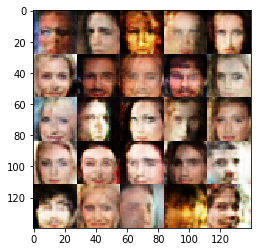

Epoch 1/1 Step 3410... Discriminator Loss: 1.4646... Generator Loss: 0.4103   difference (D-G): 1.0544
Epoch 1/1 Step 3420... Discriminator Loss: 1.4492... Generator Loss: 0.5322   difference (D-G): 0.9171
Epoch 1/1 Step 3430... Discriminator Loss: 0.7821... Generator Loss: 1.1846   difference (D-G): -0.4025
Epoch 1/1 Step 3440... Discriminator Loss: 1.2628... Generator Loss: 0.5781   difference (D-G): 0.6847
Epoch 1/1 Step 3450... Discriminator Loss: 0.7646... Generator Loss: 1.2204   difference (D-G): -0.4558
Epoch 1/1 Step 3460... Discriminator Loss: 1.3031... Generator Loss: 0.5474   difference (D-G): 0.7557
Epoch 1/1 Step 3470... Discriminator Loss: 1.5474... Generator Loss: 0.3970   difference (D-G): 1.1504
Epoch 1/1 Step 3480... Discriminator Loss: 1.0727... Generator Loss: 2.0848   difference (D-G): -1.0121
Epoch 1/1 Step 3490... Discriminator Loss: 1.5325... Generator Loss: 0.4022   difference (D-G): 1.1303
Epoch 1/1 Step 3500... Discriminator Loss: 1.2253... Generator Loss: 0

Epoch 1/1 Step 3510... Discriminator Loss: 0.8203... Generator Loss: 1.1940   difference (D-G): -0.3737
Epoch 1/1 Step 3520... Discriminator Loss: 1.1156... Generator Loss: 0.6852   difference (D-G): 0.4304
Epoch 1/1 Step 3530... Discriminator Loss: 1.2921... Generator Loss: 0.5486   difference (D-G): 0.7435
Epoch 1/1 Step 3540... Discriminator Loss: 1.0973... Generator Loss: 0.7621   difference (D-G): 0.3352
Epoch 1/1 Step 3550... Discriminator Loss: 0.5215... Generator Loss: 2.2142   difference (D-G): -1.6928
Epoch 1/1 Step 3560... Discriminator Loss: 1.4896... Generator Loss: 0.4031   difference (D-G): 1.0865
Epoch 1/1 Step 3570... Discriminator Loss: 0.7311... Generator Loss: 1.9871   difference (D-G): -1.2560
Epoch 1/1 Step 3580... Discriminator Loss: 1.3062... Generator Loss: 0.5156   difference (D-G): 0.7906
Epoch 1/1 Step 3590... Discriminator Loss: 0.8344... Generator Loss: 1.2814   difference (D-G): -0.4470
Epoch 1/1 Step 3600... Discriminator Loss: 1.5641... Generator Loss: 

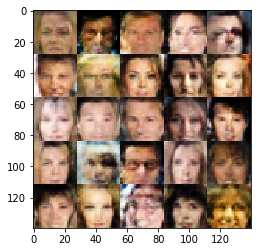

Epoch 1/1 Step 3610... Discriminator Loss: 1.7927... Generator Loss: 0.2980   difference (D-G): 1.4947
Epoch 1/1 Step 3620... Discriminator Loss: 1.2045... Generator Loss: 0.5932   difference (D-G): 0.6113
Epoch 1/1 Step 3630... Discriminator Loss: 0.7925... Generator Loss: 1.1072   difference (D-G): -0.3148
Epoch 1/1 Step 3640... Discriminator Loss: 1.0125... Generator Loss: 0.9363   difference (D-G): 0.0763
Epoch 1/1 Step 3650... Discriminator Loss: 0.6823... Generator Loss: 2.0236   difference (D-G): -1.3413
Epoch 1/1 Step 3660... Discriminator Loss: 0.7181... Generator Loss: 1.2674   difference (D-G): -0.5493
Epoch 1/1 Step 3670... Discriminator Loss: 1.1696... Generator Loss: 0.7951   difference (D-G): 0.3745
Epoch 1/1 Step 3680... Discriminator Loss: 1.0048... Generator Loss: 0.7514   difference (D-G): 0.2534
Epoch 1/1 Step 3690... Discriminator Loss: 0.9980... Generator Loss: 0.8065   difference (D-G): 0.1916
Epoch 1/1 Step 3700... Discriminator Loss: 1.3177... Generator Loss: 0

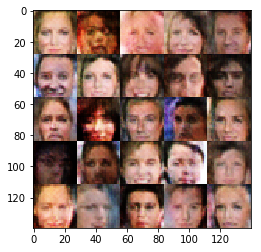

Epoch 1/1 Step 3710... Discriminator Loss: 0.8027... Generator Loss: 1.1708   difference (D-G): -0.3681
Epoch 1/1 Step 3720... Discriminator Loss: 1.5495... Generator Loss: 0.3850   difference (D-G): 1.1645
Epoch 1/1 Step 3730... Discriminator Loss: 1.8923... Generator Loss: 0.3421   difference (D-G): 1.5502
Epoch 1/1 Step 3740... Discriminator Loss: 0.9491... Generator Loss: 0.8928   difference (D-G): 0.0563
Epoch 1/1 Step 3750... Discriminator Loss: 0.9897... Generator Loss: 0.7988   difference (D-G): 0.1909
Epoch 1/1 Step 3760... Discriminator Loss: 1.2745... Generator Loss: 0.5204   difference (D-G): 0.7541
Epoch 1/1 Step 3770... Discriminator Loss: 1.6708... Generator Loss: 0.3204   difference (D-G): 1.3504
Epoch 1/1 Step 3780... Discriminator Loss: 1.0722... Generator Loss: 0.8718   difference (D-G): 0.2004
Epoch 1/1 Step 3790... Discriminator Loss: 1.1566... Generator Loss: 0.6202   difference (D-G): 0.5364
Epoch 1/1 Step 3800... Discriminator Loss: 1.3983... Generator Loss: 0.4

Epoch 1/1 Step 3810... Discriminator Loss: 1.4359... Generator Loss: 0.4319   difference (D-G): 1.0040
Epoch 1/1 Step 3820... Discriminator Loss: 1.1729... Generator Loss: 0.6096   difference (D-G): 0.5633
Epoch 1/1 Step 3830... Discriminator Loss: 0.8769... Generator Loss: 0.9461   difference (D-G): -0.0692
Epoch 1/1 Step 3840... Discriminator Loss: 1.1770... Generator Loss: 2.8501   difference (D-G): -1.6731
Epoch 1/1 Step 3850... Discriminator Loss: 1.1466... Generator Loss: 0.6151   difference (D-G): 0.5315
Epoch 1/1 Step 3860... Discriminator Loss: 0.8248... Generator Loss: 1.2915   difference (D-G): -0.4667
Epoch 1/1 Step 3870... Discriminator Loss: 1.0740... Generator Loss: 0.6633   difference (D-G): 0.4107
Epoch 1/1 Step 3880... Discriminator Loss: 0.9637... Generator Loss: 1.1278   difference (D-G): -0.1641
Epoch 1/1 Step 3890... Discriminator Loss: 1.2406... Generator Loss: 0.5499   difference (D-G): 0.6907
Epoch 1/1 Step 3900... Discriminator Loss: 1.2794... Generator Loss: 

Epoch 1/1 Step 3910... Discriminator Loss: 1.2290... Generator Loss: 0.6041   difference (D-G): 0.6249
Epoch 1/1 Step 3920... Discriminator Loss: 1.4664... Generator Loss: 0.4050   difference (D-G): 1.0615
Epoch 1/1 Step 3930... Discriminator Loss: 1.3002... Generator Loss: 0.5773   difference (D-G): 0.7228
Epoch 1/1 Step 3940... Discriminator Loss: 2.5642... Generator Loss: 0.1282   difference (D-G): 2.4360
Epoch 1/1 Step 3950... Discriminator Loss: 1.0028... Generator Loss: 0.8114   difference (D-G): 0.1915
Epoch 1/1 Step 3960... Discriminator Loss: 1.3058... Generator Loss: 0.6618   difference (D-G): 0.6440
Epoch 1/1 Step 3970... Discriminator Loss: 1.7205... Generator Loss: 0.3504   difference (D-G): 1.3702
Epoch 1/1 Step 3980... Discriminator Loss: 0.9029... Generator Loss: 0.8941   difference (D-G): 0.0088
Epoch 1/1 Step 3990... Discriminator Loss: 1.3978... Generator Loss: 0.4684   difference (D-G): 0.9293
Epoch 1/1 Step 4000... Discriminator Loss: 0.9598... Generator Loss: 1.11

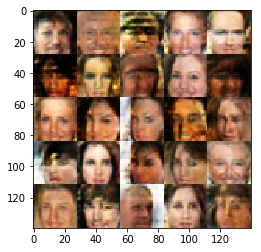

Epoch 1/1 Step 4010... Discriminator Loss: 0.6486... Generator Loss: 1.4831   difference (D-G): -0.8344
Epoch 1/1 Step 4020... Discriminator Loss: 1.4437... Generator Loss: 0.4223   difference (D-G): 1.0214
Epoch 1/1 Step 4030... Discriminator Loss: 1.0017... Generator Loss: 0.8134   difference (D-G): 0.1883
Epoch 1/1 Step 4040... Discriminator Loss: 0.9129... Generator Loss: 2.4590   difference (D-G): -1.5461
Epoch 1/1 Step 4050... Discriminator Loss: 1.6599... Generator Loss: 0.3325   difference (D-G): 1.3273
Epoch 1/1 Step 4060... Discriminator Loss: 1.3349... Generator Loss: 1.5527   difference (D-G): -0.2178
Epoch 1/1 Step 4070... Discriminator Loss: 1.2779... Generator Loss: 0.5908   difference (D-G): 0.6871
Epoch 1/1 Step 4080... Discriminator Loss: 0.8807... Generator Loss: 1.1525   difference (D-G): -0.2719
Epoch 1/1 Step 4090... Discriminator Loss: 1.0663... Generator Loss: 0.7691   difference (D-G): 0.2973
Epoch 1/1 Step 4100... Discriminator Loss: 1.1506... Generator Loss: 

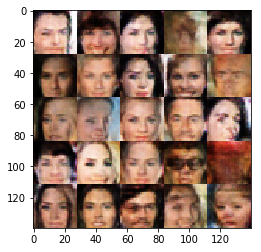

Epoch 1/1 Step 4110... Discriminator Loss: 0.7128... Generator Loss: 1.9477   difference (D-G): -1.2349
Epoch 1/1 Step 4120... Discriminator Loss: 0.7387... Generator Loss: 1.6015   difference (D-G): -0.8629
Epoch 1/1 Step 4130... Discriminator Loss: 1.1172... Generator Loss: 0.6687   difference (D-G): 0.4485
Epoch 1/1 Step 4140... Discriminator Loss: 0.8356... Generator Loss: 1.5807   difference (D-G): -0.7451
Epoch 1/1 Step 4150... Discriminator Loss: 0.8817... Generator Loss: 1.2155   difference (D-G): -0.3338
Epoch 1/1 Step 4160... Discriminator Loss: 0.9246... Generator Loss: 1.1031   difference (D-G): -0.1785
Epoch 1/1 Step 4170... Discriminator Loss: 1.0210... Generator Loss: 0.8103   difference (D-G): 0.2108
Epoch 1/1 Step 4180... Discriminator Loss: 1.2300... Generator Loss: 0.5421   difference (D-G): 0.6879
Epoch 1/1 Step 4190... Discriminator Loss: 0.8354... Generator Loss: 1.5721   difference (D-G): -0.7367
Epoch 1/1 Step 4200... Discriminator Loss: 1.1635... Generator Loss

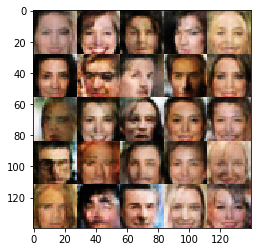

Epoch 1/1 Step 4210... Discriminator Loss: 1.6047... Generator Loss: 0.3570   difference (D-G): 1.2478
Epoch 1/1 Step 4220... Discriminator Loss: 1.8979... Generator Loss: 0.2423   difference (D-G): 1.6556
Epoch 1/1 Step 4230... Discriminator Loss: 1.3310... Generator Loss: 0.5085   difference (D-G): 0.8225
Epoch 1/1 Step 4240... Discriminator Loss: 1.3670... Generator Loss: 0.4797   difference (D-G): 0.8873
Epoch 1/1 Step 4250... Discriminator Loss: 0.8288... Generator Loss: 1.7376   difference (D-G): -0.9089
Epoch 1/1 Step 4260... Discriminator Loss: 1.2007... Generator Loss: 0.5787   difference (D-G): 0.6220
Epoch 1/1 Step 4270... Discriminator Loss: 0.9734... Generator Loss: 0.8844   difference (D-G): 0.0890
Epoch 1/1 Step 4280... Discriminator Loss: 1.7910... Generator Loss: 0.2949   difference (D-G): 1.4961
Epoch 1/1 Step 4290... Discriminator Loss: 0.8931... Generator Loss: 1.5266   difference (D-G): -0.6335
Epoch 1/1 Step 4300... Discriminator Loss: 1.8182... Generator Loss: 0.

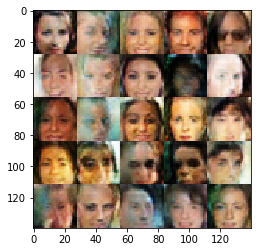

Epoch 1/1 Step 4310... Discriminator Loss: 1.0873... Generator Loss: 0.7285   difference (D-G): 0.3588
Epoch 1/1 Step 4320... Discriminator Loss: 1.4918... Generator Loss: 0.4440   difference (D-G): 1.0478
Epoch 1/1 Step 4330... Discriminator Loss: 1.0340... Generator Loss: 0.7024   difference (D-G): 0.3317
Epoch 1/1 Step 4340... Discriminator Loss: 0.8837... Generator Loss: 0.9982   difference (D-G): -0.1145
Epoch 1/1 Step 4350... Discriminator Loss: 1.3975... Generator Loss: 0.4292   difference (D-G): 0.9683
Epoch 1/1 Step 4360... Discriminator Loss: 1.9279... Generator Loss: 0.2399   difference (D-G): 1.6880
Epoch 1/1 Step 4370... Discriminator Loss: 1.4043... Generator Loss: 0.5479   difference (D-G): 0.8564
Epoch 1/1 Step 4380... Discriminator Loss: 1.2154... Generator Loss: 0.6095   difference (D-G): 0.6059
Epoch 1/1 Step 4390... Discriminator Loss: 0.9084... Generator Loss: 1.4431   difference (D-G): -0.5347
Epoch 1/1 Step 4400... Discriminator Loss: 0.8127... Generator Loss: 1.

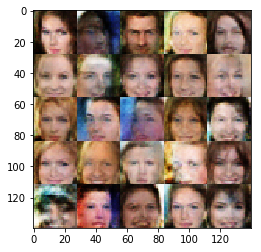

Epoch 1/1 Step 4410... Discriminator Loss: 1.4664... Generator Loss: 0.5128   difference (D-G): 0.9536
Epoch 1/1 Step 4420... Discriminator Loss: 1.0968... Generator Loss: 0.7475   difference (D-G): 0.3494
Epoch 1/1 Step 4430... Discriminator Loss: 1.4804... Generator Loss: 0.3978   difference (D-G): 1.0826
Epoch 1/1 Step 4440... Discriminator Loss: 1.1483... Generator Loss: 1.5668   difference (D-G): -0.4185
Epoch 1/1 Step 4450... Discriminator Loss: 1.0732... Generator Loss: 0.6984   difference (D-G): 0.3747
Epoch 1/1 Step 4460... Discriminator Loss: 0.8795... Generator Loss: 1.3763   difference (D-G): -0.4968
Epoch 1/1 Step 4470... Discriminator Loss: 0.9245... Generator Loss: 0.8929   difference (D-G): 0.0317
Epoch 1/1 Step 4480... Discriminator Loss: 1.3659... Generator Loss: 0.4900   difference (D-G): 0.8759
Epoch 1/1 Step 4490... Discriminator Loss: 1.9334... Generator Loss: 0.2438   difference (D-G): 1.6896
Epoch 1/1 Step 4500... Discriminator Loss: 1.0041... Generator Loss: 0.

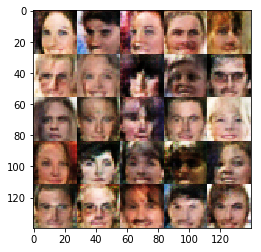

Epoch 1/1 Step 4510... Discriminator Loss: 1.1545... Generator Loss: 0.7459   difference (D-G): 0.4086
Epoch 1/1 Step 4520... Discriminator Loss: 1.0187... Generator Loss: 0.8941   difference (D-G): 0.1246
Epoch 1/1 Step 4530... Discriminator Loss: 1.0335... Generator Loss: 0.7693   difference (D-G): 0.2642
Epoch 1/1 Step 4540... Discriminator Loss: 1.6269... Generator Loss: 0.3635   difference (D-G): 1.2634
Epoch 1/1 Step 4550... Discriminator Loss: 0.9626... Generator Loss: 0.9035   difference (D-G): 0.0591
Epoch 1/1 Step 4560... Discriminator Loss: 0.9041... Generator Loss: 1.1504   difference (D-G): -0.2464
Epoch 1/1 Step 4570... Discriminator Loss: 1.4844... Generator Loss: 0.3971   difference (D-G): 1.0873
Epoch 1/1 Step 4580... Discriminator Loss: 1.1497... Generator Loss: 0.6974   difference (D-G): 0.4524
Epoch 1/1 Step 4590... Discriminator Loss: 0.7937... Generator Loss: 1.2530   difference (D-G): -0.4593
Epoch 1/1 Step 4600... Discriminator Loss: 1.1400... Generator Loss: 0.

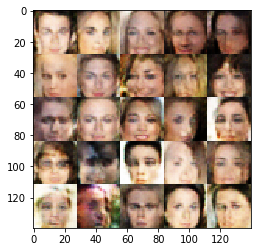

Epoch 1/1 Step 4610... Discriminator Loss: 0.7652... Generator Loss: 1.2945   difference (D-G): -0.5293
Epoch 1/1 Step 4620... Discriminator Loss: 1.4338... Generator Loss: 0.4311   difference (D-G): 1.0026
Epoch 1/1 Step 4630... Discriminator Loss: 0.9218... Generator Loss: 0.8746   difference (D-G): 0.0472
Epoch 1/1 Step 4640... Discriminator Loss: 0.7953... Generator Loss: 1.4707   difference (D-G): -0.6753
Epoch 1/1 Step 4650... Discriminator Loss: 1.1328... Generator Loss: 0.7280   difference (D-G): 0.4049
Epoch 1/1 Step 4660... Discriminator Loss: 1.0341... Generator Loss: 0.7850   difference (D-G): 0.2491
Epoch 1/1 Step 4670... Discriminator Loss: 2.0748... Generator Loss: 0.2246   difference (D-G): 1.8503
Epoch 1/1 Step 4680... Discriminator Loss: 0.8864... Generator Loss: 1.2544   difference (D-G): -0.3680
Epoch 1/1 Step 4690... Discriminator Loss: 1.1773... Generator Loss: 0.6245   difference (D-G): 0.5528
Epoch 1/1 Step 4700... Discriminator Loss: 1.6520... Generator Loss: 0

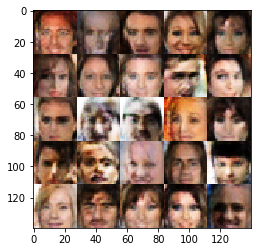

Epoch 1/1 Step 4710... Discriminator Loss: 1.9636... Generator Loss: 0.2658   difference (D-G): 1.6977
Epoch 1/1 Step 4720... Discriminator Loss: 0.8701... Generator Loss: 1.5349   difference (D-G): -0.6648
Epoch 1/1 Step 4730... Discriminator Loss: 1.7360... Generator Loss: 0.3137   difference (D-G): 1.4222
Epoch 1/1 Step 4740... Discriminator Loss: 1.9948... Generator Loss: 0.2432   difference (D-G): 1.7516
Epoch 1/1 Step 4750... Discriminator Loss: 1.4616... Generator Loss: 0.4557   difference (D-G): 1.0059
Epoch 1/1 Step 4760... Discriminator Loss: 0.9659... Generator Loss: 0.8868   difference (D-G): 0.0791
Epoch 1/1 Step 4770... Discriminator Loss: 1.3430... Generator Loss: 0.4694   difference (D-G): 0.8737
Epoch 1/1 Step 4780... Discriminator Loss: 1.0078... Generator Loss: 1.0800   difference (D-G): -0.0722
Epoch 1/1 Step 4790... Discriminator Loss: 1.7221... Generator Loss: 0.3036   difference (D-G): 1.4185
Epoch 1/1 Step 4800... Discriminator Loss: 1.0015... Generator Loss: 0.

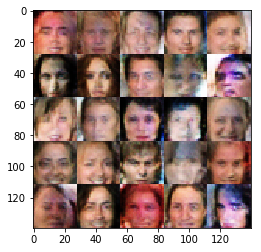

Epoch 1/1 Step 4810... Discriminator Loss: 0.9660... Generator Loss: 0.7944   difference (D-G): 0.1716
Epoch 1/1 Step 4820... Discriminator Loss: 0.9588... Generator Loss: 1.6089   difference (D-G): -0.6502
Epoch 1/1 Step 4830... Discriminator Loss: 0.9719... Generator Loss: 0.8218   difference (D-G): 0.1501
Epoch 1/1 Step 4840... Discriminator Loss: 1.0725... Generator Loss: 0.7272   difference (D-G): 0.3453
Epoch 1/1 Step 4850... Discriminator Loss: 1.9434... Generator Loss: 0.2527   difference (D-G): 1.6907
Epoch 1/1 Step 4860... Discriminator Loss: 1.4523... Generator Loss: 0.4265   difference (D-G): 1.0258
Epoch 1/1 Step 4870... Discriminator Loss: 1.5884... Generator Loss: 0.4031   difference (D-G): 1.1853
Epoch 1/1 Step 4880... Discriminator Loss: 1.3247... Generator Loss: 0.8621   difference (D-G): 0.4626
Epoch 1/1 Step 4890... Discriminator Loss: 1.2236... Generator Loss: 0.5812   difference (D-G): 0.6424
Epoch 1/1 Step 4900... Discriminator Loss: 1.5171... Generator Loss: 0.4

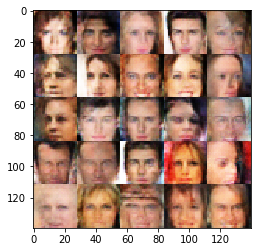

Epoch 1/1 Step 4910... Discriminator Loss: 1.1393... Generator Loss: 1.2735   difference (D-G): -0.1341
Epoch 1/1 Step 4920... Discriminator Loss: 1.4222... Generator Loss: 0.4404   difference (D-G): 0.9818
Epoch 1/1 Step 4930... Discriminator Loss: 1.1856... Generator Loss: 0.6012   difference (D-G): 0.5844
Epoch 1/1 Step 4940... Discriminator Loss: 1.0143... Generator Loss: 1.0740   difference (D-G): -0.0597
Epoch 1/1 Step 4950... Discriminator Loss: 0.8698... Generator Loss: 1.6989   difference (D-G): -0.8292
Epoch 1/1 Step 4960... Discriminator Loss: 1.5346... Generator Loss: 0.4121   difference (D-G): 1.1225
Epoch 1/1 Step 4970... Discriminator Loss: 0.7245... Generator Loss: 1.6373   difference (D-G): -0.9127
Epoch 1/1 Step 4980... Discriminator Loss: 1.3274... Generator Loss: 0.5206   difference (D-G): 0.8067
Epoch 1/1 Step 4990... Discriminator Loss: 1.0062... Generator Loss: 0.9123   difference (D-G): 0.0939
Epoch 1/1 Step 5000... Discriminator Loss: 0.9458... Generator Loss: 

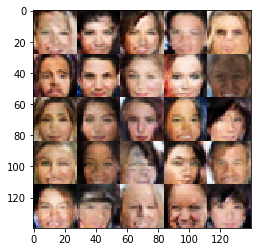

Epoch 1/1 Step 5010... Discriminator Loss: 1.1530... Generator Loss: 0.7522   difference (D-G): 0.4008
Epoch 1/1 Step 5020... Discriminator Loss: 1.3227... Generator Loss: 0.5104   difference (D-G): 0.8123
Epoch 1/1 Step 5030... Discriminator Loss: 0.9387... Generator Loss: 1.6575   difference (D-G): -0.7189
Epoch 1/1 Step 5040... Discriminator Loss: 1.1784... Generator Loss: 0.6134   difference (D-G): 0.5650
Epoch 1/1 Step 5050... Discriminator Loss: 2.2278... Generator Loss: 0.1869   difference (D-G): 2.0409
Epoch 1/1 Step 5060... Discriminator Loss: 0.8435... Generator Loss: 1.0883   difference (D-G): -0.2448
Epoch 1/1 Step 5070... Discriminator Loss: 1.0142... Generator Loss: 0.7551   difference (D-G): 0.2591
Epoch 1/1 Step 5080... Discriminator Loss: 2.1081... Generator Loss: 0.2106   difference (D-G): 1.8975
Epoch 1/1 Step 5090... Discriminator Loss: 1.4056... Generator Loss: 2.0154   difference (D-G): -0.6099
Epoch 1/1 Step 5100... Discriminator Loss: 1.1565... Generator Loss: 0

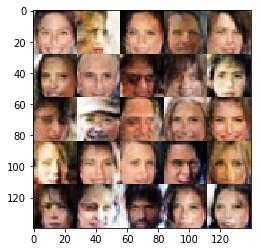

Epoch 1/1 Step 5110... Discriminator Loss: 1.2608... Generator Loss: 0.5171   difference (D-G): 0.7437
Epoch 1/1 Step 5120... Discriminator Loss: 1.0050... Generator Loss: 0.7733   difference (D-G): 0.2317
Epoch 1/1 Step 5130... Discriminator Loss: 1.3032... Generator Loss: 0.6309   difference (D-G): 0.6723
Epoch 1/1 Step 5140... Discriminator Loss: 1.1518... Generator Loss: 0.7088   difference (D-G): 0.4430
Epoch 1/1 Step 5150... Discriminator Loss: 1.0066... Generator Loss: 0.8724   difference (D-G): 0.1342
Epoch 1/1 Step 5160... Discriminator Loss: 1.3399... Generator Loss: 0.4914   difference (D-G): 0.8485
Epoch 1/1 Step 5170... Discriminator Loss: 1.0175... Generator Loss: 0.7425   difference (D-G): 0.2749
Epoch 1/1 Step 5180... Discriminator Loss: 2.0901... Generator Loss: 0.2131   difference (D-G): 1.8770
Epoch 1/1 Step 5190... Discriminator Loss: 0.9815... Generator Loss: 1.4602   difference (D-G): -0.4787
Epoch 1/1 Step 5200... Discriminator Loss: 1.1532... Generator Loss: 0.7

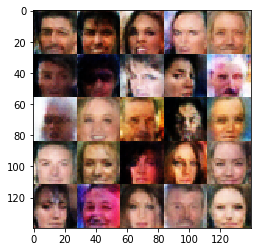

Epoch 1/1 Step 5210... Discriminator Loss: 1.0294... Generator Loss: 0.8258   difference (D-G): 0.2036
Epoch 1/1 Step 5220... Discriminator Loss: 1.0374... Generator Loss: 1.5463   difference (D-G): -0.5089
Epoch 1/1 Step 5230... Discriminator Loss: 1.0696... Generator Loss: 0.7267   difference (D-G): 0.3428
Epoch 1/1 Step 5240... Discriminator Loss: 1.1896... Generator Loss: 0.5904   difference (D-G): 0.5992
Epoch 1/1 Step 5250... Discriminator Loss: 0.9027... Generator Loss: 0.9268   difference (D-G): -0.0241
Epoch 1/1 Step 5260... Discriminator Loss: 0.7742... Generator Loss: 1.4759   difference (D-G): -0.7017
Epoch 1/1 Step 5270... Discriminator Loss: 1.1108... Generator Loss: 1.4193   difference (D-G): -0.3085
Epoch 1/1 Step 5280... Discriminator Loss: 1.2771... Generator Loss: 0.5347   difference (D-G): 0.7424
Epoch 1/1 Step 5290... Discriminator Loss: 1.8129... Generator Loss: 0.2696   difference (D-G): 1.5433
Epoch 1/1 Step 5300... Discriminator Loss: 1.4016... Generator Loss: 

Epoch 1/1 Step 5310... Discriminator Loss: 1.4021... Generator Loss: 0.4821   difference (D-G): 0.9200
Epoch 1/1 Step 5320... Discriminator Loss: 1.4409... Generator Loss: 0.4320   difference (D-G): 1.0089
Epoch 1/1 Step 5330... Discriminator Loss: 1.4696... Generator Loss: 0.4872   difference (D-G): 0.9824
Epoch 1/1 Step 5340... Discriminator Loss: 1.4450... Generator Loss: 0.4572   difference (D-G): 0.9878
Epoch 1/1 Step 5350... Discriminator Loss: 0.9336... Generator Loss: 1.6445   difference (D-G): -0.7110
Epoch 1/1 Step 5360... Discriminator Loss: 1.1260... Generator Loss: 0.9848   difference (D-G): 0.1411
Epoch 1/1 Step 5370... Discriminator Loss: 0.8025... Generator Loss: 2.2104   difference (D-G): -1.4079
Epoch 1/1 Step 5380... Discriminator Loss: 1.2617... Generator Loss: 0.5911   difference (D-G): 0.6705
Epoch 1/1 Step 5390... Discriminator Loss: 1.4062... Generator Loss: 2.4058   difference (D-G): -0.9995
Epoch 1/1 Step 5400... Discriminator Loss: 0.8509... Generator Loss: 0

Epoch 1/1 Step 5410... Discriminator Loss: 1.3676... Generator Loss: 0.5158   difference (D-G): 0.8518
Epoch 1/1 Step 5420... Discriminator Loss: 1.2200... Generator Loss: 0.6571   difference (D-G): 0.5629
Epoch 1/1 Step 5430... Discriminator Loss: 0.7967... Generator Loss: 1.2222   difference (D-G): -0.4255
Epoch 1/1 Step 5440... Discriminator Loss: 0.9747... Generator Loss: 0.9237   difference (D-G): 0.0510
Epoch 1/1 Step 5450... Discriminator Loss: 0.9403... Generator Loss: 1.9366   difference (D-G): -0.9963
Epoch 1/1 Step 5460... Discriminator Loss: 0.8167... Generator Loss: 1.3628   difference (D-G): -0.5461
Epoch 1/1 Step 5470... Discriminator Loss: 1.6581... Generator Loss: 0.3149   difference (D-G): 1.3431
Epoch 1/1 Step 5480... Discriminator Loss: 1.0565... Generator Loss: 1.5309   difference (D-G): -0.4743
Epoch 1/1 Step 5490... Discriminator Loss: 1.2328... Generator Loss: 0.5975   difference (D-G): 0.6353
Epoch 1/1 Step 5500... Discriminator Loss: 1.0802... Generator Loss: 

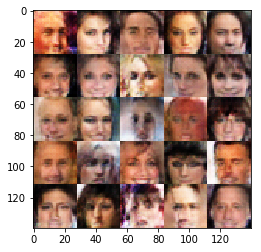

Epoch 1/1 Step 5510... Discriminator Loss: 0.9541... Generator Loss: 1.7742   difference (D-G): -0.8201
Epoch 1/1 Step 5520... Discriminator Loss: 1.0000... Generator Loss: 1.4247   difference (D-G): -0.4247
Epoch 1/1 Step 5530... Discriminator Loss: 1.1637... Generator Loss: 2.9789   difference (D-G): -1.8152
Epoch 1/1 Step 5540... Discriminator Loss: 1.0247... Generator Loss: 0.8525   difference (D-G): 0.1722
Epoch 1/1 Step 5550... Discriminator Loss: 0.8985... Generator Loss: 0.8978   difference (D-G): 0.0008
Epoch 1/1 Step 5560... Discriminator Loss: 1.4293... Generator Loss: 0.4794   difference (D-G): 0.9499
Epoch 1/1 Step 5570... Discriminator Loss: 0.9850... Generator Loss: 0.8859   difference (D-G): 0.0991
Epoch 1/1 Step 5580... Discriminator Loss: 0.9450... Generator Loss: 0.9280   difference (D-G): 0.0170
Epoch 1/1 Step 5590... Discriminator Loss: 0.9844... Generator Loss: 1.0808   difference (D-G): -0.0964
Epoch 1/1 Step 5600... Discriminator Loss: 1.1116... Generator Loss: 

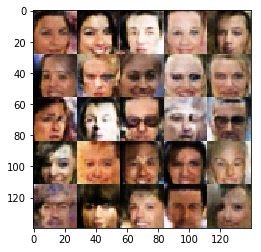

Epoch 1/1 Step 5610... Discriminator Loss: 0.8875... Generator Loss: 0.9878   difference (D-G): -0.1004
Epoch 1/1 Step 5620... Discriminator Loss: 1.0562... Generator Loss: 1.1106   difference (D-G): -0.0544
Epoch 1/1 Step 5630... Discriminator Loss: 1.4043... Generator Loss: 0.4416   difference (D-G): 0.9627
Epoch 1/1 Step 5640... Discriminator Loss: 0.7975... Generator Loss: 2.0212   difference (D-G): -1.2237
Epoch 1/1 Step 5650... Discriminator Loss: 1.5331... Generator Loss: 0.3935   difference (D-G): 1.1395
Epoch 1/1 Step 5660... Discriminator Loss: 1.0210... Generator Loss: 0.8248   difference (D-G): 0.1962
Epoch 1/1 Step 5670... Discriminator Loss: 1.2400... Generator Loss: 0.5666   difference (D-G): 0.6733
Epoch 1/1 Step 5680... Discriminator Loss: 1.0586... Generator Loss: 0.7506   difference (D-G): 0.3080
Epoch 1/1 Step 5690... Discriminator Loss: 1.1996... Generator Loss: 0.5920   difference (D-G): 0.6076
Epoch 1/1 Step 5700... Discriminator Loss: 0.9190... Generator Loss: 1

Epoch 1/1 Step 5710... Discriminator Loss: 1.1467... Generator Loss: 0.6414   difference (D-G): 0.5054
Epoch 1/1 Step 5720... Discriminator Loss: 0.9796... Generator Loss: 1.1331   difference (D-G): -0.1535
Epoch 1/1 Step 5730... Discriminator Loss: 0.7823... Generator Loss: 1.4123   difference (D-G): -0.6300
Epoch 1/1 Step 5740... Discriminator Loss: 0.7324... Generator Loss: 1.2607   difference (D-G): -0.5283
Epoch 1/1 Step 5750... Discriminator Loss: 1.1540... Generator Loss: 0.6782   difference (D-G): 0.4758
Epoch 1/1 Step 5760... Discriminator Loss: 0.7426... Generator Loss: 1.8737   difference (D-G): -1.1311
Epoch 1/1 Step 5770... Discriminator Loss: 0.9395... Generator Loss: 1.1201   difference (D-G): -0.1806
Epoch 1/1 Step 5780... Discriminator Loss: 1.4636... Generator Loss: 0.4214   difference (D-G): 1.0422
Epoch 1/1 Step 5790... Discriminator Loss: 1.2546... Generator Loss: 0.5336   difference (D-G): 0.7210
Epoch 1/1 Step 5800... Discriminator Loss: 1.0399... Generator Loss:

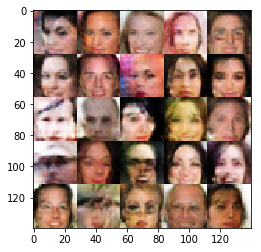

Epoch 1/1 Step 5810... Discriminator Loss: 2.3691... Generator Loss: 0.1547   difference (D-G): 2.2145
Epoch 1/1 Step 5820... Discriminator Loss: 1.3683... Generator Loss: 0.4492   difference (D-G): 0.9191
Epoch 1/1 Step 5830... Discriminator Loss: 1.1061... Generator Loss: 0.7770   difference (D-G): 0.3291
Epoch 1/1 Step 5840... Discriminator Loss: 0.9182... Generator Loss: 0.8946   difference (D-G): 0.0236
Epoch 1/1 Step 5850... Discriminator Loss: 1.1088... Generator Loss: 0.6490   difference (D-G): 0.4598
Epoch 1/1 Step 5860... Discriminator Loss: 1.0554... Generator Loss: 2.2198   difference (D-G): -1.1644
Epoch 1/1 Step 5870... Discriminator Loss: 1.0230... Generator Loss: 0.8686   difference (D-G): 0.1544
Epoch 1/1 Step 5880... Discriminator Loss: 1.8728... Generator Loss: 0.2573   difference (D-G): 1.6155
Epoch 1/1 Step 5890... Discriminator Loss: 1.1974... Generator Loss: 0.5845   difference (D-G): 0.6130
Epoch 1/1 Step 5900... Discriminator Loss: 1.1853... Generator Loss: 1.0

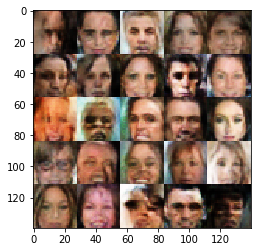

Epoch 1/1 Step 5910... Discriminator Loss: 1.0276... Generator Loss: 0.9394   difference (D-G): 0.0882
Epoch 1/1 Step 5920... Discriminator Loss: 0.7090... Generator Loss: 1.6296   difference (D-G): -0.9206
Epoch 1/1 Step 5930... Discriminator Loss: 0.8537... Generator Loss: 1.0973   difference (D-G): -0.2436
Epoch 1/1 Step 5940... Discriminator Loss: 0.8565... Generator Loss: 1.1785   difference (D-G): -0.3220
Epoch 1/1 Step 5950... Discriminator Loss: 0.8147... Generator Loss: 1.1381   difference (D-G): -0.3234
Epoch 1/1 Step 5960... Discriminator Loss: 1.4981... Generator Loss: 0.4913   difference (D-G): 1.0069
Epoch 1/1 Step 5970... Discriminator Loss: 1.0019... Generator Loss: 1.1059   difference (D-G): -0.1040
Epoch 1/1 Step 5980... Discriminator Loss: 0.7814... Generator Loss: 1.3447   difference (D-G): -0.5634
Epoch 1/1 Step 5990... Discriminator Loss: 1.0739... Generator Loss: 0.8551   difference (D-G): 0.2188
Epoch 1/1 Step 6000... Discriminator Loss: 1.2831... Generator Loss

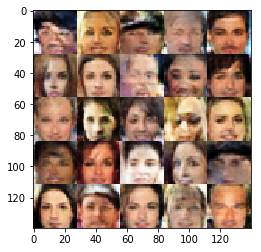

Epoch 1/1 Step 6010... Discriminator Loss: 1.2393... Generator Loss: 1.4666   difference (D-G): -0.2273
Epoch 1/1 Step 6020... Discriminator Loss: 1.0407... Generator Loss: 0.8023   difference (D-G): 0.2384
Epoch 1/1 Step 6030... Discriminator Loss: 1.0896... Generator Loss: 0.8022   difference (D-G): 0.2874
Epoch 1/1 Step 6040... Discriminator Loss: 1.1274... Generator Loss: 0.7194   difference (D-G): 0.4080
Epoch 1/1 Step 6050... Discriminator Loss: 0.8672... Generator Loss: 0.9275   difference (D-G): -0.0603
Epoch 1/1 Step 6060... Discriminator Loss: 1.3070... Generator Loss: 0.5065   difference (D-G): 0.8005
Epoch 1/1 Step 6070... Discriminator Loss: 1.0441... Generator Loss: 0.7598   difference (D-G): 0.2843
Epoch 1/1 Step 6080... Discriminator Loss: 1.5905... Generator Loss: 0.3886   difference (D-G): 1.2018
Epoch 1/1 Step 6090... Discriminator Loss: 1.2004... Generator Loss: 0.6976   difference (D-G): 0.5028
Epoch 1/1 Step 6100... Discriminator Loss: 0.9667... Generator Loss: 1.

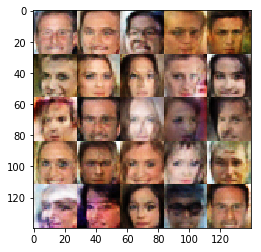

Epoch 1/1 Step 6110... Discriminator Loss: 2.1795... Generator Loss: 0.1876   difference (D-G): 1.9919
Epoch 1/1 Step 6120... Discriminator Loss: 2.5178... Generator Loss: 0.1361   difference (D-G): 2.3818
Epoch 1/1 Step 6130... Discriminator Loss: 2.2066... Generator Loss: 0.1795   difference (D-G): 2.0271
Epoch 1/1 Step 6140... Discriminator Loss: 1.8772... Generator Loss: 0.2562   difference (D-G): 1.6210
Epoch 1/1 Step 6150... Discriminator Loss: 1.5987... Generator Loss: 0.3748   difference (D-G): 1.2238
Epoch 1/1 Step 6160... Discriminator Loss: 2.0364... Generator Loss: 0.2339   difference (D-G): 1.8025
Epoch 1/1 Step 6170... Discriminator Loss: 0.9220... Generator Loss: 1.4947   difference (D-G): -0.5727
Epoch 1/1 Step 6180... Discriminator Loss: 1.0248... Generator Loss: 0.8220   difference (D-G): 0.2028
Epoch 1/1 Step 6190... Discriminator Loss: 1.4088... Generator Loss: 0.4407   difference (D-G): 0.9681
Epoch 1/1 Step 6200... Discriminator Loss: 1.1654... Generator Loss: 1.4

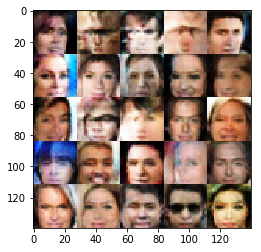

Epoch 1/1 Step 6210... Discriminator Loss: 1.2176... Generator Loss: 0.6641   difference (D-G): 0.5536
Epoch 1/1 Step 6220... Discriminator Loss: 1.7169... Generator Loss: 0.2977   difference (D-G): 1.4192
Epoch 1/1 Step 6230... Discriminator Loss: 1.0788... Generator Loss: 0.6617   difference (D-G): 0.4171
Epoch 1/1 Step 6240... Discriminator Loss: 0.8733... Generator Loss: 0.9781   difference (D-G): -0.1048
Epoch 1/1 Step 6250... Discriminator Loss: 0.9732... Generator Loss: 0.7826   difference (D-G): 0.1906
Epoch 1/1 Step 6260... Discriminator Loss: 0.8139... Generator Loss: 1.5961   difference (D-G): -0.7822
Epoch 1/1 Step 6270... Discriminator Loss: 1.0379... Generator Loss: 0.7587   difference (D-G): 0.2793
Epoch 1/1 Step 6280... Discriminator Loss: 0.9114... Generator Loss: 0.9482   difference (D-G): -0.0368
Epoch 1/1 Step 6290... Discriminator Loss: 1.7144... Generator Loss: 0.3599   difference (D-G): 1.3545
Epoch 1/1 Step 6300... Discriminator Loss: 1.2169... Generator Loss: 0

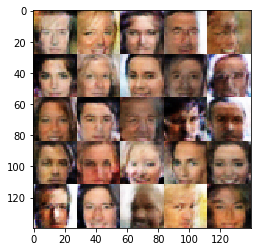

Epoch 1/1 Step 6310... Discriminator Loss: 1.7036... Generator Loss: 0.3330   difference (D-G): 1.3706
Epoch 1/1 Step 6320... Discriminator Loss: 1.5529... Generator Loss: 0.4585   difference (D-G): 1.0944
Epoch 1/1 Step 6330... Discriminator Loss: 0.7882... Generator Loss: 1.8729   difference (D-G): -1.0847


In [62]:
batch_size = 32
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.